In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# cd drive/MyDrive/Thesis

In [3]:
# !pip install pycodestyle pycodestyle_magic
# !pip install flake8
# %load_ext pycodestyle_magic

In [1]:
# %%pycodestyle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb

from collections import Counter
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve
from sklearn.metrics import plot_roc_curve, precision_score
from sklearn.metrics import recall_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

# Data Preparation

## Load DataFrame


In [2]:
# %%pycodestyle
df = pd.read_csv('creditcard.csv')
df.head()
# Time: Number of seconds elapsed between this transaction and the first transaction in the dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<AxesSubplot:>

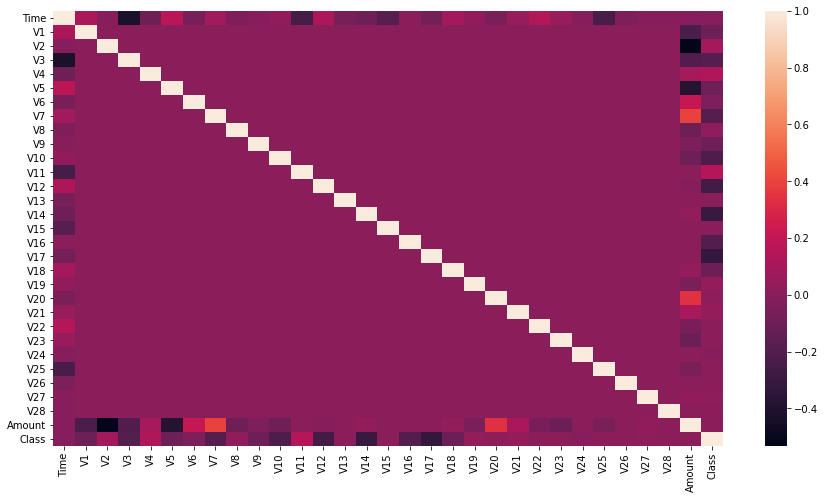

In [3]:
# %%pycodestyle
plt.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(15, 8))
sns.heatmap(df.corr())

[Text(0, 0, 'Genuine (0)'), Text(1, 0, 'Fraud (1)')]

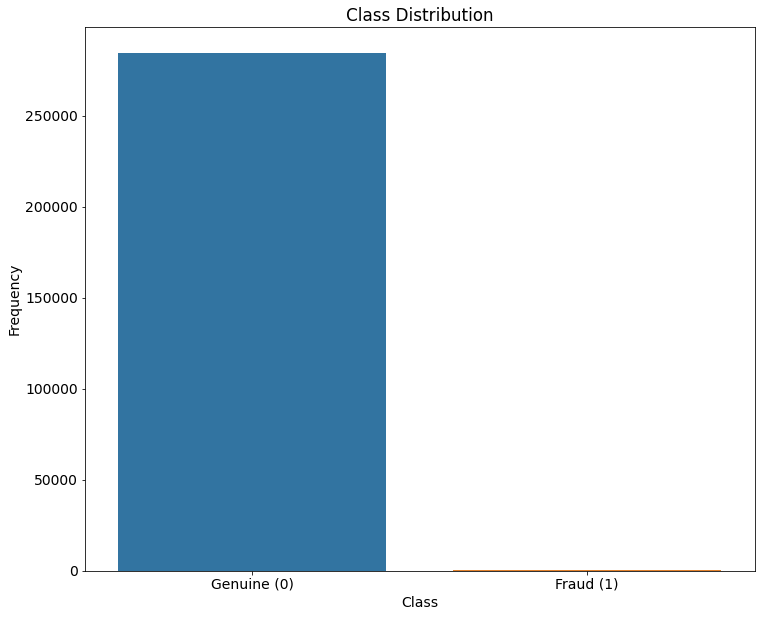

In [4]:
# %%pycodestyle
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(figsize=(12, 10))
ax = sns.countplot(data=df, x='Class')
ax.set_title('Class Distribution')
ax.set(xlabel="Class", ylabel = "Frequency")
ax.set_xticklabels(['Genuine (0)', 'Fraud (1)'])

## Normalization ('Amount')


In [5]:
scaler = StandardScaler()
df[['Amount']] = scaler.fit_transform(df[['Amount']].values)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


## Split X, y

In [6]:
# %%pycodestyle
y = df[['Class']]
X = df.drop(['Class'], axis=1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)

## Random Oversampling

In [8]:
oversampler = RandomOverSampler(sampling_strategy=0.1, random_state=14)
X_over_1, y_over_1 = oversampler.fit_resample(X_train,y_train)
y_over_1 = np.ravel(y_over_1)
print(Counter(y_over_1))

oversampler = RandomOverSampler(sampling_strategy=0.2, random_state=14)
X_over_2, y_over_2 = oversampler.fit_resample(X_train,y_train)
y_over_2 = np.ravel(y_over_2)
print(Counter(y_over_2))

oversampler = RandomOverSampler(sampling_strategy=0.3, random_state=14)
X_over_3, y_over_3 = oversampler.fit_resample(X_train,y_train)
y_over_3 = np.ravel(y_over_3)
print(Counter(y_over_3))

oversampler = RandomOverSampler(sampling_strategy=0.4, random_state=14)
X_over_4, y_over_4 = oversampler.fit_resample(X_train,y_train)
y_over_4 = np.ravel(y_over_4)
print(Counter(y_over_4))

oversampler = RandomOverSampler(sampling_strategy=0.5, random_state=14)
X_over_5, y_over_5 = oversampler.fit_resample(X_train,y_train)
y_over_5 = np.ravel(y_over_5)
print(Counter(y_over_5))

oversampler = RandomOverSampler(sampling_strategy=0.6, random_state=14)
X_over_6, y_over_6 = oversampler.fit_resample(X_train,y_train)
y_over_6 = np.ravel(y_over_6)
print(Counter(y_over_6))

oversampler = RandomOverSampler(sampling_strategy=0.7, random_state=14)
X_over_7, y_over_7 = oversampler.fit_resample(X_train,y_train)
y_over_7 = np.ravel(y_over_7)
print(Counter(y_over_7))

oversampler = RandomOverSampler(sampling_strategy=0.7, random_state=14)
X_over_7, y_over_7 = oversampler.fit_resample(X_train,y_train)
y_over_7 = np.ravel(y_over_7)
print(Counter(y_over_7))

oversampler = RandomOverSampler(sampling_strategy=0.8, random_state=14)
X_over_8, y_over_8 = oversampler.fit_resample(X_train,y_train)
y_over_8 = np.ravel(y_over_8)
print(Counter(y_over_8))

oversampler = RandomOverSampler(sampling_strategy=0.9, random_state=14)
X_over_9, y_over_9 = oversampler.fit_resample(X_train,y_train)
y_over_9 = np.ravel(y_over_9)
print(Counter(y_over_9))

oversampler = RandomOverSampler(sampling_strategy='minority', random_state=14)
X_over, y_over = oversampler.fit_resample(X_train,y_train)
y_over = np.ravel(y_over)
print(Counter(y_over))

Counter({0: 199013, 1: 19901})
Counter({0: 199013, 1: 39802})
Counter({0: 199013, 1: 59703})
Counter({0: 199013, 1: 79605})
Counter({0: 199013, 1: 99506})
Counter({0: 199013, 1: 119407})
Counter({0: 199013, 1: 139309})
Counter({0: 199013, 1: 139309})
Counter({0: 199013, 1: 159210})
Counter({0: 199013, 1: 179111})
Counter({0: 199013, 1: 199013})


## Random Undersampling

In [9]:
undersampler = RandomUnderSampler(sampling_strategy=0.1, random_state=14)
X_under_1, y_under_1 = undersampler.fit_resample(X_train,y_train)
y_under_1 = np.ravel(y_under_1)
print(Counter(y_under_1))

undersampler = RandomUnderSampler(sampling_strategy=0.2, random_state=14)
X_under_2, y_under_2 = undersampler.fit_resample(X_train,y_train)
y_under_2 = np.ravel(y_under_2)
print(Counter(y_under_2))

undersampler = RandomUnderSampler(sampling_strategy=0.3, random_state=14)
X_under_3, y_under_3 = undersampler.fit_resample(X_train,y_train)
y_under_3 = np.ravel(y_under_3)
print(Counter(y_under_3))

undersampler = RandomUnderSampler(sampling_strategy=0.4, random_state=14)
X_under_4, y_under_4 = undersampler.fit_resample(X_train,y_train)
y_under_4 = np.ravel(y_under_4)
print(Counter(y_under_4))

undersampler = RandomUnderSampler(sampling_strategy=0.5, random_state=14)
X_under_5, y_under_5 = undersampler.fit_resample(X_train,y_train)
y_under_5 = np.ravel(y_under_5)
print(Counter(y_under_5))

undersampler = RandomUnderSampler(sampling_strategy=0.6, random_state=14)
X_under_6, y_under_6 = undersampler.fit_resample(X_train,y_train)
y_under_6 = np.ravel(y_under_6)
print(Counter(y_under_6))

undersampler = RandomUnderSampler(sampling_strategy=0.7, random_state=14)
X_under_7, y_under_7 = undersampler.fit_resample(X_train,y_train)
y_under_7 = np.ravel(y_under_7)
print(Counter(y_under_7))

undersampler = RandomUnderSampler(sampling_strategy=0.8, random_state=14)
X_under_8, y_under_8 = undersampler.fit_resample(X_train,y_train)
y_under_8 = np.ravel(y_under_8)
print(Counter(y_under_8))

undersampler = RandomUnderSampler(sampling_strategy=0.9, random_state=14)
X_under_9, y_under_9 = undersampler.fit_resample(X_train,y_train)
y_under_9 = np.ravel(y_under_9)
print(Counter(y_under_9))

undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=14)
X_under, y_under = undersampler.fit_resample(X_train,y_train)
y_under = np.ravel(y_under)
print(Counter(y_under))

Counter({0: 3510, 1: 351})
Counter({0: 1755, 1: 351})
Counter({0: 1170, 1: 351})
Counter({0: 877, 1: 351})
Counter({0: 702, 1: 351})
Counter({0: 585, 1: 351})
Counter({0: 501, 1: 351})
Counter({0: 438, 1: 351})
Counter({0: 390, 1: 351})
Counter({0: 351, 1: 351})


## SMOTE

In [10]:
smote = SMOTE(sampling_strategy=0.1,random_state=14)
X_smote_1, y_smote_1 = smote.fit_resample(X_train, y_train)
y_smote_1 = np.ravel(y_smote_1)
print(Counter(y_smote_1))

smote = SMOTE(sampling_strategy=0.2,random_state=14)
X_smote_2, y_smote_2 = smote.fit_resample(X_train, y_train)
y_smote_2 = np.ravel(y_smote_2)
print(Counter(y_smote_2))

smote = SMOTE(sampling_strategy=0.3,random_state=14)
X_smote_3, y_smote_3 = smote.fit_resample(X_train, y_train)
y_smote_3 = np.ravel(y_smote_3)
print(Counter(y_smote_3))

smote = SMOTE(sampling_strategy=0.4,random_state=14)
X_smote_4, y_smote_4 = smote.fit_resample(X_train, y_train)
y_smote_4 = np.ravel(y_smote_4)
print(Counter(y_smote_4))

smote = SMOTE(sampling_strategy=0.5,random_state=14)
X_smote_5, y_smote_5 = smote.fit_resample(X_train, y_train)
y_smote_5 = np.ravel(y_smote_5)
print(Counter(y_smote_5))

smote = SMOTE(sampling_strategy=0.6,random_state=14)
X_smote_6, y_smote_6 = smote.fit_resample(X_train, y_train)
y_smote_6 = np.ravel(y_smote_6)
print(Counter(y_smote_6))

smote = SMOTE(sampling_strategy=0.7,random_state=14)
X_smote_7, y_smote_7 = smote.fit_resample(X_train, y_train)
y_smote_7 = np.ravel(y_smote_7)
print(Counter(y_smote_7))

smote = SMOTE(sampling_strategy=0.8,random_state=14)
X_smote_8, y_smote_8 = smote.fit_resample(X_train, y_train)
y_smote_8 = np.ravel(y_smote_8)
print(Counter(y_smote_8))

smote = SMOTE(sampling_strategy=0.9,random_state=14)
X_smote_9, y_smote_9 = smote.fit_resample(X_train, y_train)
y_smote_9 = np.ravel(y_smote_9)
print(Counter(y_smote_9))

smote = SMOTE(sampling_strategy='minority',random_state=14)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
y_smote = np.ravel(y_smote)
print(Counter(y_smote))

Counter({0: 199013, 1: 19901})
Counter({0: 199013, 1: 39802})
Counter({0: 199013, 1: 59703})
Counter({0: 199013, 1: 79605})
Counter({0: 199013, 1: 99506})
Counter({0: 199013, 1: 119407})
Counter({0: 199013, 1: 139309})
Counter({0: 199013, 1: 159210})
Counter({0: 199013, 1: 179111})
Counter({0: 199013, 1: 199013})


## Tomek Links Removal

In [11]:
tomek = TomekLinks(sampling_strategy='majority')
# X_tomek, y_tomek = tomek.fit_resample(X_train,y_train)
# y_tomek = np.ravel(y_tomek)
# Counter(y_tomek)

## Hybrid

In [12]:
# Applying tomek after smote
# X_hybrid_7, y_hybrid_7 = tomek.fit_resample(X_smote_7, y_smote_7)
# y_hybrid_7 = np.ravel(y_hybrid_7)
# Counter(y_hybrid_7)

X_hybrid, y_hybrid = tomek.fit_resample(X_smote, y_smote)
y_hybrid = np.ravel(y_hybrid)
Counter(y_hybrid)

Counter({0: 198798, 1: 199013})

# Random Forest with No Resampling

## Parameter Tuning using Cross-Validation

In [9]:
RF_PARAM = PARAM = {'n_estimators':[100,150,200,250,300,350,400,450,500]}

In [16]:
clf = RandomForestClassifier(random_state=14)
search = GridSearchCV(clf, RF_PARAM, cv=10, verbose=3)

In [17]:
search.fit(X_train, np.ravel(y_train))

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV 1/10] END ..............................n_estimators=100; total time= 3.4min
[CV 2/10] END ..............................n_estimators=100; total time= 3.0min
[CV 3/10] END ..............................n_estimators=100; total time= 2.6min
[CV 4/10] END ..............................n_estimators=100; total time= 2.6min
[CV 5/10] END ..............................n_estimators=100; total time= 2.3min
[CV 6/10] END ..............................n_estimators=100; total time= 2.5min
[CV 7/10] END ..............................n_estimators=100; total time= 2.4min
[CV 8/10] END ..............................n_estimators=100; total time= 2.9min
[CV 9/10] END ..............................n_estimators=100; total time= 2.9min
[CV 10/10] END .............................n_estimators=100; total time= 3.0min
[CV 1/10] END ..............................n_estimators=150; total time= 4.4min
[CV 2/10] END ..............................n_es

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=14),
             param_grid={'n_estimators': [100, 150, 200, 250, 300, 350, 400,
                                          450, 500]},
             verbose=3)

In [28]:
best_n_estimator = search.best_params_['n_estimators']
print(best_n_estimator) #250
RF = RandomForestClassifier(n_estimators=best_n_estimator, verbose=2)
RF.fit(X_train, y_train)
y_RF_pred = RF.predict(X_test)

250
building tree 1 of 250


<ipython-input-28-fa4c420ed775>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(X_train, y_train)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


building tree 2 of 250
building tree 3 of 250
building tree 4 of 250
building tree 5 of 250
building tree 6 of 250
building tree 7 of 250
building tree 8 of 250
building tree 9 of 250
building tree 10 of 250
building tree 11 of 250
building tree 12 of 250
building tree 13 of 250
building tree 14 of 250
building tree 15 of 250
building tree 16 of 250
building tree 17 of 250
building tree 18 of 250
building tree 19 of 250
building tree 20 of 250
building tree 21 of 250
building tree 22 of 250
building tree 23 of 250
building tree 24 of 250
building tree 25 of 250
building tree 26 of 250
building tree 27 of 250
building tree 28 of 250
building tree 29 of 250
building tree 30 of 250
building tree 31 of 250
building tree 32 of 250
building tree 33 of 250
building tree 34 of 250
building tree 35 of 250
building tree 36 of 250
building tree 37 of 250
building tree 38 of 250
building tree 39 of 250
building tree 40 of 250
building tree 41 of 250
building tree 42 of 250
building tree 43 of 250


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  7.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    6.4s finished


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    3.5s finished


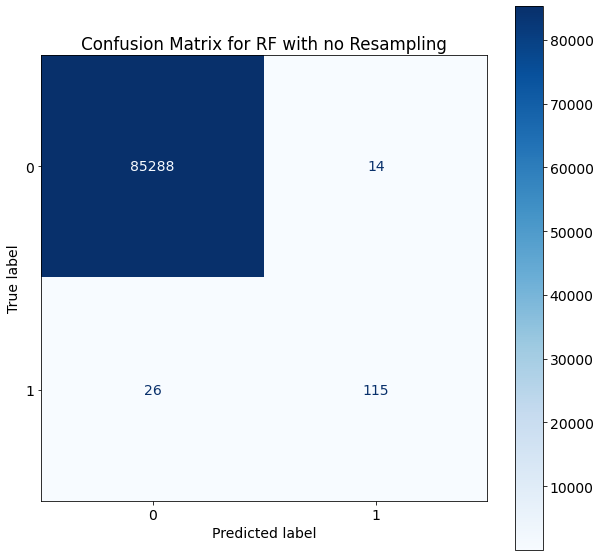

In [29]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Confusion Matrix for RF with no Resampling')
plot_confusion_matrix(RF, X_test, y_test, cmap='Blues', ax=ax, values_format='d')

## Precision, Recall and F1 Score for RF with No Resampling

### Precision

In [30]:
precision_RF_1 = round(precision_score(y_test,y_RF_pred,pos_label=1),5)
print(precision_RF_1)
precision_RF_0 = round(precision_score(y_test,y_RF_pred,pos_label=0),5)
print(precision_RF_0)
precision_RF_avg = round(precision_score(y_test,y_RF_pred,average='weighted'),5)
print(precision_RF_avg)

0.89147
0.9997
0.99952


### Recall

In [31]:
recall_RF_1 = round(recall_score(y_test,y_RF_pred,pos_label=1),5)
print(recall_RF_1)
recall_RF_0 = round(recall_score(y_test,y_RF_pred,pos_label=0),5)
print(recall_RF_0)
recall_RF_avg = round(recall_score(y_test,y_RF_pred,average='weighted'),5)
print(recall_RF_avg)

0.8156
0.99984
0.99953


### F1 Score

In [32]:
f1_RF_1 = round(f1_score(y_test,y_RF_pred,pos_label=1),5)
print(f1_RF_1)
f1_RF_0 = round(precision_score(y_test,y_RF_pred,pos_label=0),5)
print(f1_RF_0)
f1_RF_avg = round(f1_score(y_test,y_RF_pred,average='weighted'),5)
print(f1_RF_avg)

0.85185
0.9997
0.99952


### Classification Report

In [33]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_RF_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

     Class 0    0.99970   0.99984   0.99977     85302
     Class 1    0.89147   0.81560   0.85185       141

    accuracy                        0.99953     85443
   macro avg    0.94558   0.90772   0.92581     85443
weighted avg    0.99952   0.99953   0.99952     85443



## PR Curve 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    3.5s finished


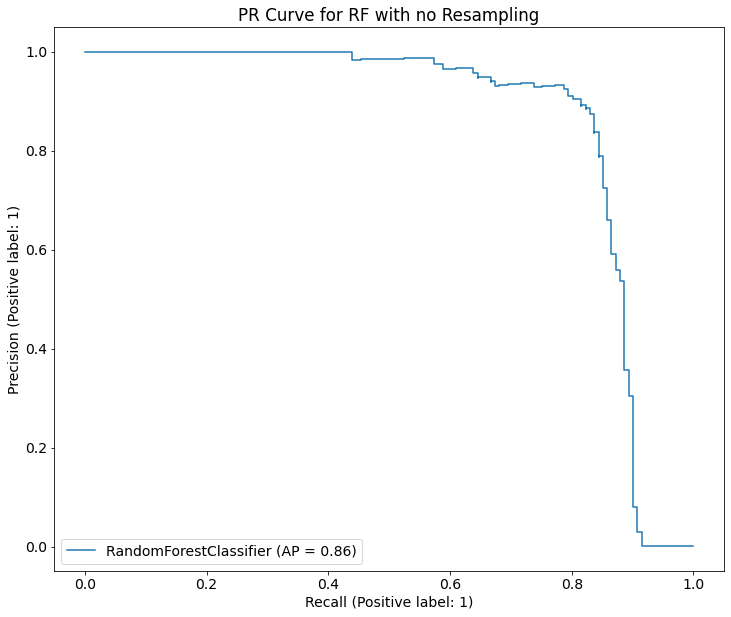

In [34]:
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('PR Curve for RF with no Resampling')
plot_precision_recall_curve(RF, X_test, y_test, ax=ax)

## ROC Curve

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    2.7s finished


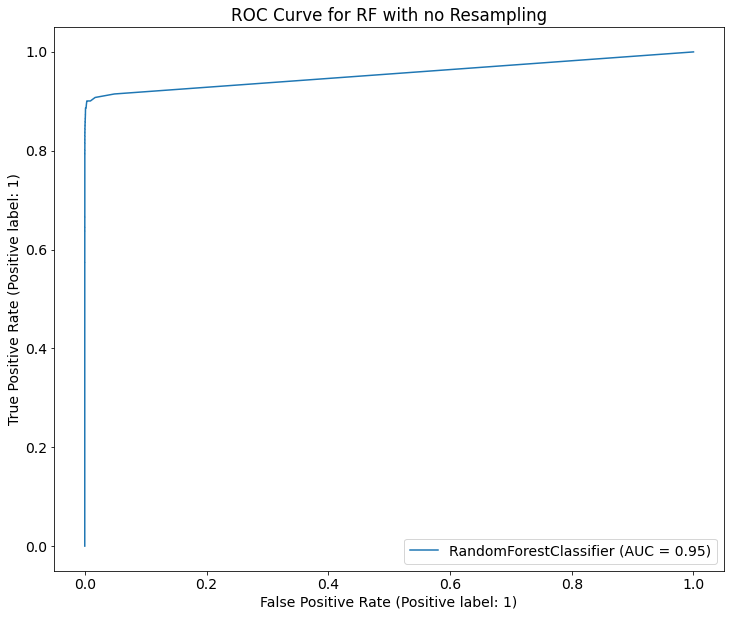

In [35]:
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('ROC Curve for RF with no Resampling')
plot_roc_curve(RF, X_test, y_test, ax=ax)

# Random Forest with Random Oversampling

## 10% Oversampling

### Parameter Tuning using Cross-Validation

In [10]:
clf = RandomForestClassifier(random_state=14)
search_over = GridSearchCV(clf, RF_PARAM, cv=10, verbose=3)

In [11]:
search_over.fit(X_over_1,y_over_1)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV 1/10] END ..............................n_estimators=100; total time= 2.3min
[CV 2/10] END ..............................n_estimators=100; total time= 2.3min
[CV 3/10] END ..............................n_estimators=100; total time= 2.3min
[CV 4/10] END ..............................n_estimators=100; total time= 2.2min
[CV 5/10] END ..............................n_estimators=100; total time= 2.3min
[CV 6/10] END ..............................n_estimators=100; total time= 2.3min
[CV 7/10] END ..............................n_estimators=100; total time= 2.4min
[CV 8/10] END ..............................n_estimators=100; total time= 2.4min
[CV 9/10] END ..............................n_estimators=100; total time= 2.3min
[CV 10/10] END .............................n_estimators=100; total time= 2.4min
[CV 1/10] END ..............................n_estimators=150; total time= 3.5min
[CV 2/10] END ..............................n_es

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=14),
             param_grid={'n_estimators': [100, 150, 200, 250, 300, 350, 400,
                                          450, 500]},
             verbose=3)

In [12]:
best_n_estimator = search_over.best_params_['n_estimators']
print(best_n_estimator)
RF_over = RandomForestClassifier(n_estimators=best_n_estimator, verbose=2, n_jobs=-1)
RF_over.fit(X_over_1, y_over_1)
y_RF_pred = RF_over.predict(X_test)

200
building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   15.1s


building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66 of 200
building tree 67 of 200
building tree 68 of 200
building tree 69 of 200
building tree 70 of 200
building tree 71 of 200
building tree 72 of 200
building tree 73 of 200
building tree 74 of 200
building tree 75 of 200
building tree 76 of 200
building tree 77 of 200
building tree 78 of 200
building tree 79 of 200
building tree 80 of 200
building tree 81

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min


building tree 159 of 200
building tree 160 of 200
building tree 161 of 200
building tree 162 of 200
building tree 163 of 200
building tree 164 of 200
building tree 165 of 200
building tree 166 of 200
building tree 167 of 200
building tree 168 of 200
building tree 169 of 200
building tree 170 of 200
building tree 171 of 200
building tree 172 of 200
building tree 173 of 200
building tree 174 of 200
building tree 175 of 200
building tree 176 of 200
building tree 177 of 200
building tree 178 of 200
building tree 179 of 200
building tree 180 of 200
building tree 181 of 200
building tree 182 of 200
building tree 183 of 200
building tree 184 of 200
building tree 185 of 200
building tree 186 of 200
building tree 187 of 200
building tree 188 of 200
building tree 189 of 200
building tree 190 of 200
building tree 191 of 200
building tree 192 of 200
building tree 193 of 200
building tree 194 of 200
building tree 195 of 200
building tree 196 of 200
building tree 197 of 200
building tree 198 of 200


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.4min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.4s finished


### Confusion Matrix for RF with 10% Random Oversampling

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.6s finished


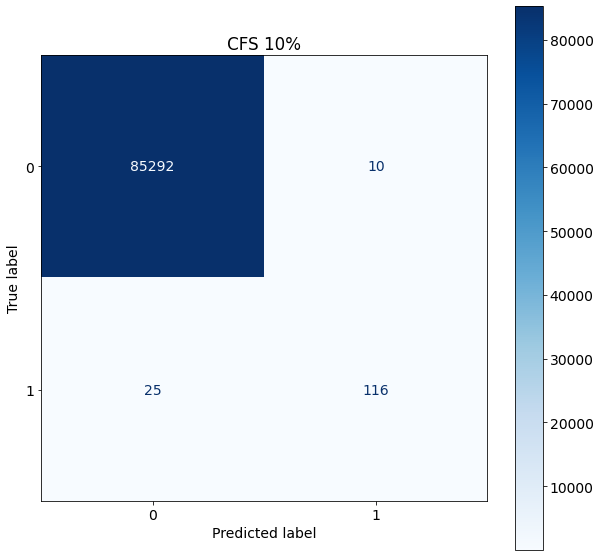

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('CFS 10%')
plot_confusion_matrix(RF_over, X_test, y_test, cmap='Blues', ax=ax, values_format='d')
fig.savefig('CFS_RO_10.png')

### Precision, Recall and F1 Score for RF with 10% Random Oversampling

#### Precision

In [15]:
precision_RF_1 = round(precision_score(y_test,y_RF_pred,pos_label=1),5)
print(precision_RF_1)
precision_RF_0 = round(precision_score(y_test,y_RF_pred,pos_label=0),5)
print(precision_RF_0)
precision_RF_avg = round(precision_score(y_test,y_RF_pred,average='weighted'),5)
print(precision_RF_avg)

0.92063
0.99971
0.99958


#### Recall

In [16]:
recall_RF_1 = round(recall_score(y_test,y_RF_pred,pos_label=1),5)
print(recall_RF_1)
recall_RF_0 = round(recall_score(y_test,y_RF_pred,pos_label=0),5)
print(recall_RF_0)
recall_RF_avg = round(recall_score(y_test,y_RF_pred,average='weighted'),5)
print(recall_RF_avg)

0.8227
0.99988
0.99959


#### F1 Score

In [17]:
f1_RF_1 = round(f1_score(y_test,y_RF_pred,pos_label=1),5)
print(f1_RF_1)
f1_RF_0 = round(precision_score(y_test,y_RF_pred,pos_label=0),5)
print(f1_RF_0)
f1_RF_avg = round(f1_score(y_test,y_RF_pred,average='weighted'),5)
print(f1_RF_avg)

0.86891
0.99971
0.99958


#### Classification Report

In [18]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_RF_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

     Class 0    0.99971   0.99988   0.99979     85302
     Class 1    0.92063   0.82270   0.86891       141

    accuracy                        0.99959     85443
   macro avg    0.96017   0.91129   0.93435     85443
weighted avg    0.99958   0.99959   0.99958     85443



### PR Curve

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.5s finished


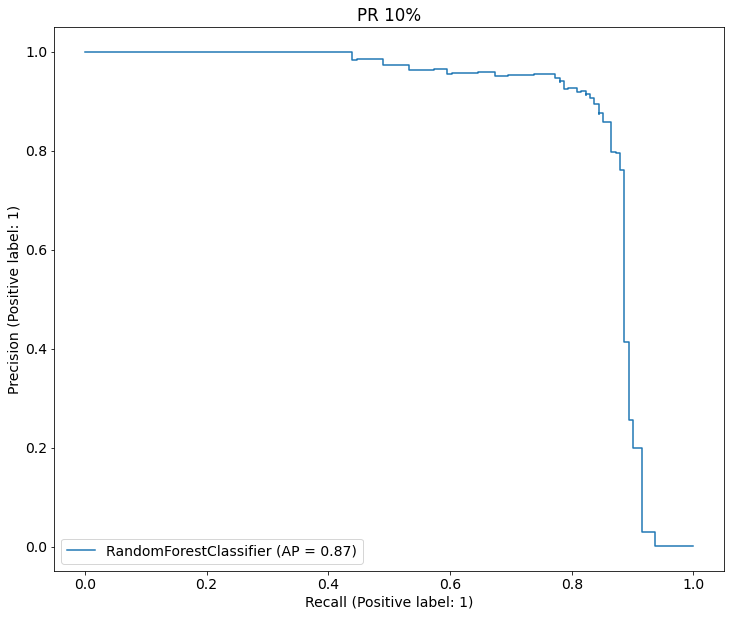

In [23]:
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('PR 10%')
plot_precision_recall_curve(RF_over, X_test, y_test, ax=ax)
fig.savefig('PR_RO_10.png')

### ROC Curve

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.5s finished


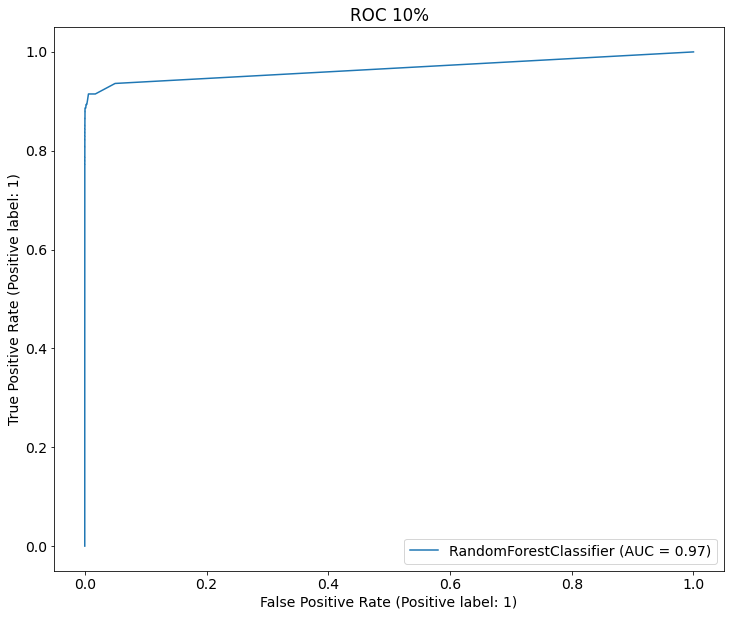

In [24]:
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('ROC 10%')
plot_roc_curve(RF_over, X_test, y_test, ax=ax)
fig.savefig('ROC_RO_10.png')

## 20% Oversampling

### Parameter Tuning using Cross-Validation

In [25]:
clf = RandomForestClassifier(random_state=14)
search_over = GridSearchCV(clf, RF_PARAM, cv=10, verbose=3)

In [26]:
search_over.fit(X_over_2,y_over_2)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV 1/10] END ..............................n_estimators=100; total time= 1.7min
[CV 2/10] END ..............................n_estimators=100; total time= 1.8min
[CV 3/10] END ..............................n_estimators=100; total time= 1.7min
[CV 4/10] END ..............................n_estimators=100; total time= 1.8min
[CV 5/10] END ..............................n_estimators=100; total time= 2.1min
[CV 6/10] END ..............................n_estimators=100; total time= 2.2min
[CV 7/10] END ..............................n_estimators=100; total time= 1.9min
[CV 8/10] END ..............................n_estimators=100; total time= 1.8min
[CV 9/10] END ..............................n_estimators=100; total time= 1.9min
[CV 10/10] END .............................n_estimators=100; total time= 1.9min
[CV 1/10] END ..............................n_estimators=150; total time= 2.7min
[CV 2/10] END ..............................n_es

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=14),
             param_grid={'n_estimators': [100, 150, 200, 250, 300, 350, 400,
                                          450, 500]},
             verbose=3)

In [27]:
best_n_estimator = search_over.best_params_['n_estimators']
print(best_n_estimator)
RF_over = RandomForestClassifier(n_estimators=best_n_estimator, verbose=2, n_jobs=-1)
RF_over.fit(X_over_2, y_over_2)
y_RF_pred = RF_over.predict(X_test)

100
building tree 1 of 100building tree 2 of 100
building tree 3 of 100
building tree 4 of 100



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.7s


building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   41.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


### Confusion Matrix for RF with 20% Random Oversampling

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


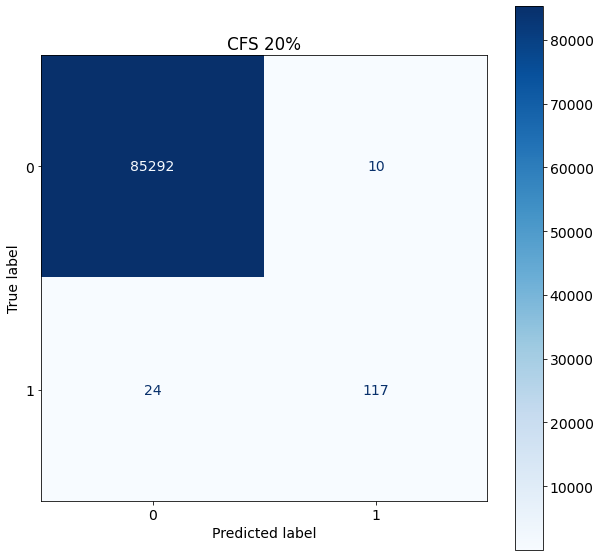

In [28]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('CFS 20%')
plot_confusion_matrix(RF_over, X_test, y_test, cmap='Blues', ax=ax, values_format='d')
fig.savefig('CFS_RO_20.png')

### Precision, Recall and F1 Score for RF with 20% Random Oversampling

#### Precision

In [29]:
precision_RF_1 = round(precision_score(y_test,y_RF_pred,pos_label=1),5)
print(precision_RF_1)
precision_RF_0 = round(precision_score(y_test,y_RF_pred,pos_label=0),5)
print(precision_RF_0)
precision_RF_avg = round(precision_score(y_test,y_RF_pred,average='weighted'),5)
print(precision_RF_avg)

0.92126
0.99972
0.99959


#### Recall

In [30]:
recall_RF_1 = round(recall_score(y_test,y_RF_pred,pos_label=1),5)
print(recall_RF_1)
recall_RF_0 = round(recall_score(y_test,y_RF_pred,pos_label=0),5)
print(recall_RF_0)
recall_RF_avg = round(recall_score(y_test,y_RF_pred,average='weighted'),5)
print(recall_RF_avg)

0.82979
0.99988
0.9996


#### F1 Score

In [31]:
f1_RF_1 = round(f1_score(y_test,y_RF_pred,pos_label=1),5)
print(f1_RF_1)
f1_RF_0 = round(precision_score(y_test,y_RF_pred,pos_label=0),5)
print(f1_RF_0)
f1_RF_avg = round(f1_score(y_test,y_RF_pred,average='weighted'),5)
print(f1_RF_avg)

0.87313
0.99972
0.99959


#### Classification Report

In [32]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_RF_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

     Class 0    0.99972   0.99988   0.99980     85302
     Class 1    0.92126   0.82979   0.87313       141

    accuracy                        0.99960     85443
   macro avg    0.96049   0.91484   0.93647     85443
weighted avg    0.99959   0.99960   0.99959     85443



### PR Curve

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


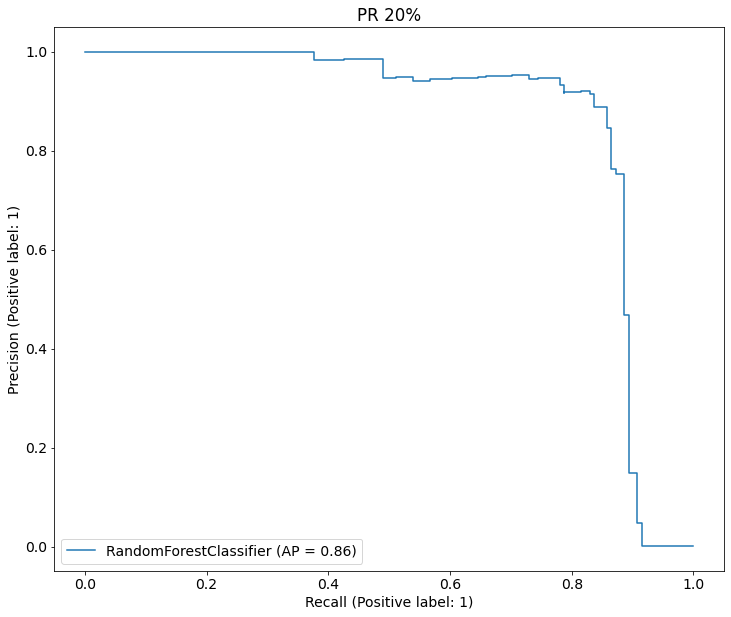

In [33]:
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('PR 20%')
plot_precision_recall_curve(RF_over, X_test, y_test, ax=ax)
fig.savefig('PR_RO_20.png')

### ROC Curve

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


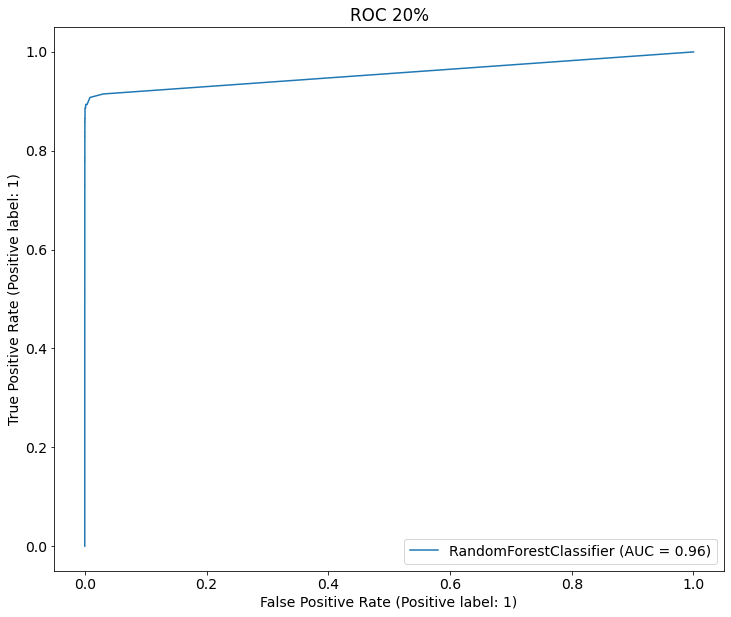

In [34]:
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('ROC 20%')
plot_roc_curve(RF_over, X_test, y_test, ax=ax)
fig.savefig('ROC_RO_20.png')

## 30% Oversampling

### Parameter Tuning using Cross-Validation

In [35]:
clf = RandomForestClassifier(random_state=14, n_jobs=-1)
search_over = GridSearchCV(clf, RF_PARAM, cv=10, verbose=3, n_jobs=-1)

In [ ]:
search_over.fit(X_over_3,y_over_3)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


In [ ]:
best_n_estimator = search_over.best_params_['n_estimators']
print(best_n_estimator)
RF_over = RandomForestClassifier(n_estimators=best_n_estimator, verbose=2, n_jobs=-1)
RF_over.fit(X_over_3, y_over_3)
y_RF_pred = RF_over.predict(X_test)

### Confusion Matrix for RF with 30% Random Oversampling

In [ ]:
axs1[1,0].set_title('CFS 30%')
plot_confusion_matrix(RF_over, X_test, y_test, cmap='Blues', ax=axs1[1,0], values_format='d')

### Precision, Recall and F1 Score for RF with 30% Random Oversampling

#### Precision

In [ ]:
precision_RF_1 = round(precision_score(y_test,y_RF_pred,pos_label=1),5)
print(precision_RF_1)
precision_RF_0 = round(precision_score(y_test,y_RF_pred,pos_label=0),5)
print(precision_RF_0)
precision_RF_avg = round(precision_score(y_test,y_RF_pred,average='weighted'),5)
print(precision_RF_avg)

#### Recall

In [ ]:
recall_RF_1 = round(recall_score(y_test,y_RF_pred,pos_label=1),5)
print(recall_RF_1)
recall_RF_0 = round(recall_score(y_test,y_RF_pred,pos_label=0),5)
print(recall_RF_0)
recall_RF_avg = round(recall_score(y_test,y_RF_pred,average='weighted'),5)
print(recall_RF_avg)

#### F1 Score

In [ ]:
f1_RF_1 = round(f1_score(y_test,y_RF_pred,pos_label=1),5)
print(f1_RF_1)
f1_RF_0 = round(precision_score(y_test,y_RF_pred,pos_label=0),5)
print(f1_RF_0)
f1_RF_avg = round(f1_score(y_test,y_RF_pred,average='weighted'),5)
print(f1_RF_avg)

#### Classification Report

In [ ]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_RF_pred, target_names=target_names, digits=5))

### PR Curve

In [ ]:
axs2[1,0].set_title('PR 30%')
plot_precision_recall_curve(RF_over, X_test, y_test, ax=axs2[1,0])

### ROC Curve

In [ ]:
axs3[1,0].set_title('ROC 30%')
plot_roc_curve(RF_over, X_test, y_test, ax=axs3[1,0])

## 40% Oversampling

### Parameter Tuning using Cross-Validation

In [ ]:
clf = RandomForestClassifier(random_state=14, n_jobs=-1)
search_over = GridSearchCV(clf, RF_PARAM, cv=10, verbose=3, n_jobs=-1)

In [ ]:
search_over.fit(X_over_4,y_over_4)

In [ ]:
best_n_estimator = search_over.best_params_['n_estimators']
print(best_n_estimator)
RF_over = RandomForestClassifier(n_estimators=best_n_estimator, verbose=2, n_jobs=-1)
RF_over.fit(X_over_4, y_over_4)
y_RF_pred = RF_over.predict(X_test)

### Confusion Matrix for RF with 40% Random Oversampling

In [ ]:
axs1[1,1].set_title('CFS 40%')
plot_confusion_matrix(RF_over, X_test, y_test, cmap='Blues', ax=axs1[1,1], values_format='d')

### Precision, Recall and F1 Score for RF with 40% Random Oversampling

#### Precision

In [ ]:
precision_RF_1 = round(precision_score(y_test,y_RF_pred,pos_label=1),5)
print(precision_RF_1)
precision_RF_0 = round(precision_score(y_test,y_RF_pred,pos_label=0),5)
print(precision_RF_0)
precision_RF_avg = round(precision_score(y_test,y_RF_pred,average='weighted'),5)
print(precision_RF_avg)

#### Recall

In [ ]:
recall_RF_1 = round(recall_score(y_test,y_RF_pred,pos_label=1),5)
print(recall_RF_1)
recall_RF_0 = round(recall_score(y_test,y_RF_pred,pos_label=0),5)
print(recall_RF_0)
recall_RF_avg = round(recall_score(y_test,y_RF_pred,average='weighted'),5)
print(recall_RF_avg)

#### F1 Score

In [ ]:
f1_RF_1 = round(f1_score(y_test,y_RF_pred,pos_label=1),5)
print(f1_RF_1)
f1_RF_0 = round(precision_score(y_test,y_RF_pred,pos_label=0),5)
print(f1_RF_0)
f1_RF_avg = round(f1_score(y_test,y_RF_pred,average='weighted'),5)
print(f1_RF_avg)

#### Classification Report

In [ ]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_RF_pred, target_names=target_names, digits=5))

### PR Curve

In [ ]:
axs2[1,1].set_title('PR 40%')
plot_precision_recall_curve(RF_over, X_test, y_test, ax=axs2[1,1])

### ROC Curve

In [ ]:
axs3[1,1].set_title('ROC 40%')
plot_roc_curve(RF_over, X_test, y_test, ax=axs3[1,1])

## 50% Oversampling

### Parameter Tuning using Cross-Validation

In [ ]:
clf = RandomForestClassifier(random_state=14, n_jobs=-1)
search_over = GridSearchCV(clf, RF_PARAM, cv=10, verbose=3, n_jobs=-1)

In [ ]:
search_over.fit(X_over_5,y_over_5)

In [ ]:
best_n_estimator = search_over.best_params_['n_estimators']
print(best_n_estimator)
RF_over = RandomForestClassifier(n_estimators=best_n_estimator, verbose=2, n_jobs=-1)
RF_over.fit(X_over_5, y_over_5)
y_RF_pred = RF_over.predict(X_test)

### Confusion Matrix for RF with 50% Random Oversampling

In [ ]:
axs1[2,0].set_title('CFS 50%')
plot_confusion_matrix(RF_over, X_test, y_test, cmap='Blues', ax=axs1[2,0], values_format='d')

### Precision, Recall and F1 Score for RF with 50% Random Oversampling

#### Precision

In [ ]:
precision_RF_1 = round(precision_score(y_test,y_RF_pred,pos_label=1),5)
print(precision_RF_1)
precision_RF_0 = round(precision_score(y_test,y_RF_pred,pos_label=0),5)
print(precision_RF_0)
precision_RF_avg = round(precision_score(y_test,y_RF_pred,average='weighted'),5)
print(precision_RF_avg)

#### Recall

In [ ]:
recall_RF_1 = round(recall_score(y_test,y_RF_pred,pos_label=1),5)
print(recall_RF_1)
recall_RF_0 = round(recall_score(y_test,y_RF_pred,pos_label=0),5)
print(recall_RF_0)
recall_RF_avg = round(recall_score(y_test,y_RF_pred,average='weighted'),5)
print(recall_RF_avg)

#### F1 Score

In [ ]:
f1_RF_1 = round(f1_score(y_test,y_RF_pred,pos_label=1),5)
print(f1_RF_1)
f1_RF_0 = round(precision_score(y_test,y_RF_pred,pos_label=0),5)
print(f1_RF_0)
f1_RF_avg = round(f1_score(y_test,y_RF_pred,average='weighted'),5)
print(f1_RF_avg)

#### Classification Report

In [ ]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_RF_pred, target_names=target_names, digits=5))

### PR Curve

In [ ]:
axs2[2,0].set_title('PR 50%')
plot_precision_recall_curve(RF_over, X_test, y_test, ax=axs2[2,0])

### ROC Curve

In [ ]:
axs3[2,0].set_title('ROC 50%')
plot_roc_curve(RF_over, X_test, y_test, ax=axs3[2,0])

## 60% Oversampling

### Parameter Tuning using Cross-Validation

In [ ]:
clf = RandomForestClassifier(random_state=14, n_jobs=-1)
search_over = GridSearchCV(clf, RF_PARAM, cv=10, verbose=3, n_jobs=-1)

In [ ]:
search_over.fit(X_over_6,y_over_6)

In [ ]:
best_n_estimator = search_over.best_params_['n_estimators']
print(best_n_estimator)
RF_over = RandomForestClassifier(n_estimators=best_n_estimator, verbose=2, n_jobs=-1)
RF_over.fit(X_over_6, y_over_6)
y_RF_pred = RF_over.predict(X_test)

### Confusion Matrix for RF with 60% Random Oversampling

In [ ]:
axs1[2,1].set_title('CFS 60%')
plot_confusion_matrix(RF_over, X_test, y_test, cmap='Blues', ax=axs1[2,1], values_format='d')

### Precision, Recall and F1 Score for RF with 60% Random Oversampling

#### Precision

In [ ]:
precision_RF_1 = round(precision_score(y_test,y_RF_pred,pos_label=1),5)
print(precision_RF_1)
precision_RF_0 = round(precision_score(y_test,y_RF_pred,pos_label=0),5)
print(precision_RF_0)
precision_RF_avg = round(precision_score(y_test,y_RF_pred,average='weighted'),5)
print(precision_RF_avg)

#### Recall

In [ ]:
recall_RF_1 = round(recall_score(y_test,y_RF_pred,pos_label=1),5)
print(recall_RF_1)
recall_RF_0 = round(recall_score(y_test,y_RF_pred,pos_label=0),5)
print(recall_RF_0)
recall_RF_avg = round(recall_score(y_test,y_RF_pred,average='weighted'),5)
print(recall_RF_avg)

#### F1 Score

In [ ]:
f1_RF_1 = round(f1_score(y_test,y_RF_pred,pos_label=1),5)
print(f1_RF_1)
f1_RF_0 = round(precision_score(y_test,y_RF_pred,pos_label=0),5)
print(f1_RF_0)
f1_RF_avg = round(f1_score(y_test,y_RF_pred,average='weighted'),5)
print(f1_RF_avg)

#### Classification Report

In [ ]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_RF_pred, target_names=target_names, digits=5))

### PR Curve

In [ ]:
axs2[2,1].set_title('PR 60%')
plot_precision_recall_curve(RF_over, X_test, y_test, ax=axs2[2,1])

### ROC Curve

In [ ]:
axs3[2,1].set_title('ROC 60%')
plot_roc_curve(RF_over, X_test, y_test, ax=axs3[2,1])

## 70% Oversampling

### Parameter Tuning using Cross-Validation

In [12]:
clf = RandomForestClassifier(random_state=14,n_jobs=-1)
search_over = GridSearchCV(clf, RF_PARAM, cv=10, verbose=3, n_jobs=-1)

In [13]:
search_over.fit(X_over_7,y_over_7)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV 1/10] END ..............................n_estimators=100; total time= 2.2min
[CV 2/10] END ..............................n_estimators=100; total time= 2.0min
[CV 3/10] END ..............................n_estimators=100; total time= 2.0min
[CV 4/10] END ..............................n_estimators=100; total time= 2.1min
[CV 5/10] END ..............................n_estimators=100; total time= 2.0min
[CV 6/10] END ..............................n_estimators=100; total time= 1.9min
[CV 7/10] END ..............................n_estimators=100; total time= 2.0min
[CV 8/10] END ..............................n_estimators=100; total time= 2.3min
[CV 9/10] END ..............................n_estimators=100; total time= 2.3min
[CV 10/10] END .............................n_estimators=100; total time= 2.5min
[CV 1/10] END ..............................n_estimators=150; total time= 3.6min
[CV 2/10] END ..............................n_es

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=14),
             param_grid={'n_estimators': [100, 150, 200, 250, 300, 350, 400,
                                          450, 500]},
             verbose=3)

In [15]:
best_n_estimator = search_over.best_params_['n_estimators']
print(best_n_estimator) #100
RF_over = RandomForestClassifier(n_estimators=best_n_estimator, verbose=2,n_jobs=-1)
RF_over.fit(X_over_7, y_over_7)
y_RF_pred = RF_over.predict(X_test)

100
building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


### Confusion Matrix for RF with 70% Random Oversampling

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


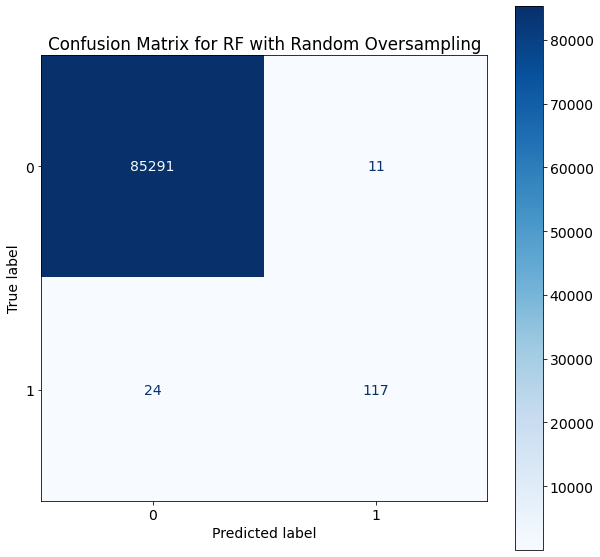

In [16]:
axs1[3,0].set_title('CFS 70%')
plot_confusion_matrix(RF_over, X_test, y_test, cmap='Blues', ax=axs1[3,0], values_format='d')

### Precision, Recall and F1 Score for RF with 70% Random Oversampling

#### Precision

In [17]:
precision_RF_1 = round(precision_score(y_test,y_RF_pred,pos_label=1),5)
print(precision_RF_1)
precision_RF_0 = round(precision_score(y_test,y_RF_pred,pos_label=0),5)
print(precision_RF_0)
precision_RF_avg = round(precision_score(y_test,y_RF_pred,average='weighted'),5)
print(precision_RF_avg)

0.91406
0.99972
0.99958


#### Recall

In [18]:
recall_RF_1 = round(recall_score(y_test,y_RF_pred,pos_label=1),5)
print(recall_RF_1)
recall_RF_0 = round(recall_score(y_test,y_RF_pred,pos_label=0),5)
print(recall_RF_0)
recall_RF_avg = round(recall_score(y_test,y_RF_pred,average='weighted'),5)
print(recall_RF_avg)

0.82979
0.99987
0.99959


#### F1 Score

In [19]:
f1_RF_1 = round(f1_score(y_test,y_RF_pred,pos_label=1),5)
print(f1_RF_1)
f1_RF_0 = round(precision_score(y_test,y_RF_pred,pos_label=0),5)
print(f1_RF_0)
f1_RF_avg = round(f1_score(y_test,y_RF_pred,average='weighted'),5)
print(f1_RF_avg)

0.86989
0.99972
0.99958


#### Classification Report

In [20]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_RF_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

     Class 0    0.99972   0.99987   0.99979     85302
     Class 1    0.91406   0.82979   0.86989       141

    accuracy                        0.99959     85443
   macro avg    0.95689   0.91483   0.93484     85443
weighted avg    0.99958   0.99959   0.99958     85443



### PR Curve

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


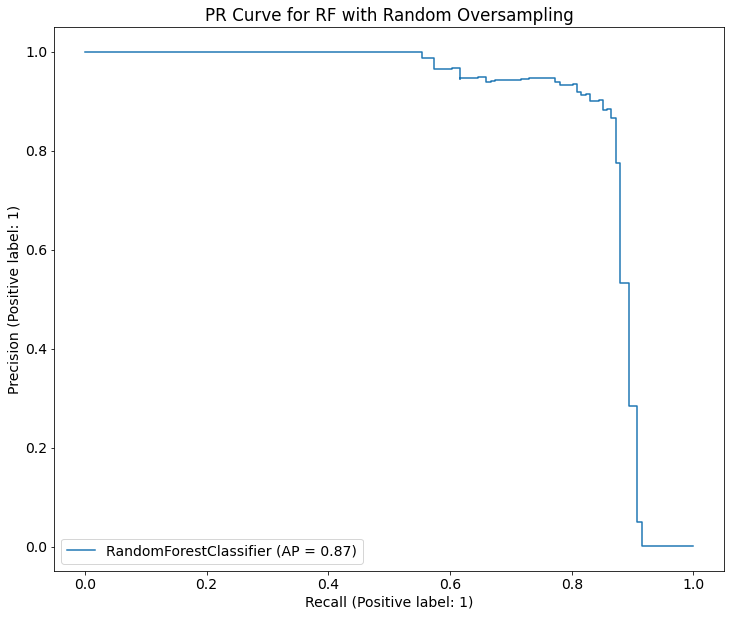

In [21]:
axs2[3,0].set_title('PR 70%')
plot_precision_recall_curve(RF_over, X_test, y_test, ax=axs2[3,0])

### ROC Curve

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


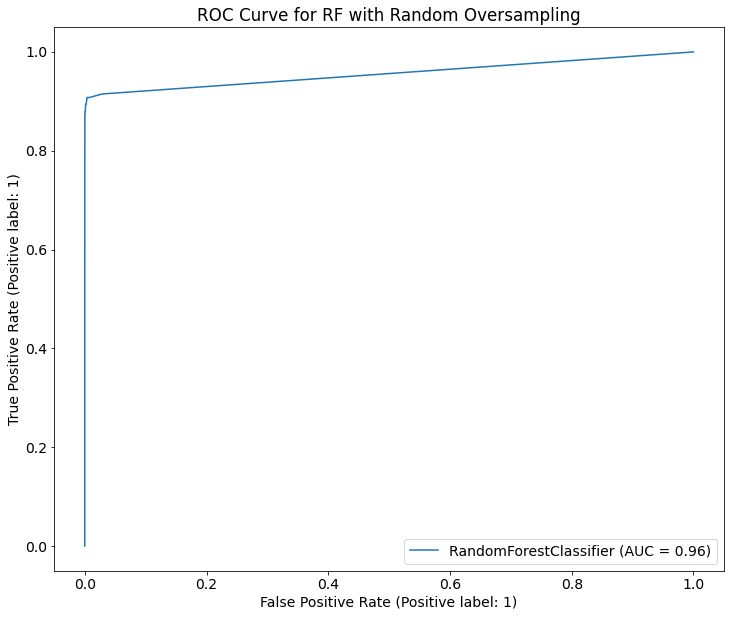

In [22]:
axs3[3,0].set_title('ROC 70%')
plot_roc_curve(RF_over, X_test, y_test, ax=axs3[3,0])

## 80% Oversampling

### Parameter Tuning using Cross-Validation

In [ ]:
clf = RandomForestClassifier(random_state=14, n_jobs=-1)
search_over = GridSearchCV(clf, RF_PARAM, cv=10, verbose=3, n_jobs=-1)

In [ ]:
search_over.fit(X_over_8,y_over_8)

In [ ]:
best_n_estimator = search_over.best_params_['n_estimators']
print(best_n_estimator)
RF_over = RandomForestClassifier(n_estimators=best_n_estimator, verbose=2, n_jobs=-1)
RF_over.fit(X_over_8, y_over_8)
y_RF_pred = RF_over.predict(X_test)

### Confusion Matrix for RF with 80% Random Oversampling

In [ ]:
axs1[3,1].set_title('CFS 80%')
plot_confusion_matrix(RF_over, X_test, y_test, cmap='Blues', ax=axs1[3,1], values_format='d')

### Precision, Recall and F1 Score for RF with 80% Random Oversampling

#### Precision

In [ ]:
precision_RF_1 = round(precision_score(y_test,y_RF_pred,pos_label=1),5)
print(precision_RF_1)
precision_RF_0 = round(precision_score(y_test,y_RF_pred,pos_label=0),5)
print(precision_RF_0)
precision_RF_avg = round(precision_score(y_test,y_RF_pred,average='weighted'),5)
print(precision_RF_avg)

#### Recall

In [ ]:
recall_RF_1 = round(recall_score(y_test,y_RF_pred,pos_label=1),5)
print(recall_RF_1)
recall_RF_0 = round(recall_score(y_test,y_RF_pred,pos_label=0),5)
print(recall_RF_0)
recall_RF_avg = round(recall_score(y_test,y_RF_pred,average='weighted'),5)
print(recall_RF_avg)

#### F1 Score

In [ ]:
f1_RF_1 = round(f1_score(y_test,y_RF_pred,pos_label=1),5)
print(f1_RF_1)
f1_RF_0 = round(precision_score(y_test,y_RF_pred,pos_label=0),5)
print(f1_RF_0)
f1_RF_avg = round(f1_score(y_test,y_RF_pred,average='weighted'),5)
print(f1_RF_avg)

#### Classification Report

In [ ]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_RF_pred, target_names=target_names, digits=5))

### PR Curve

In [ ]:
axs2[3,1].set_title('PR 80%')
plot_precision_recall_curve(RF_over, X_test, y_test, ax=axs2[3,1])

### ROC Curve

In [ ]:
axs3[3,1].set_title('ROC 80%')
plot_roc_curve(RF_over, X_test, y_test, ax=axs3[3,1])

## 90% Oversampling

### Parameter Tuning using Cross-Validation

In [ ]:
clf = RandomForestClassifier(random_state=14, n_jobs=-1)
search_over = GridSearchCV(clf, RF_PARAM, cv=10, verbose=3, n_jobs=-1)

In [ ]:
search_over.fit(X_over_9,y_over_9)

In [ ]:
best_n_estimator = search_over.best_params_['n_estimators']
print(best_n_estimator)
RF_over = RandomForestClassifier(n_estimators=best_n_estimator, verbose=2, n_jobs=-1)
RF_over.fit(X_over_9, y_over_9)
y_RF_pred = RF_over.predict(X_test)

### Confusion Matrix for RF with 90% Random Oversampling

In [ ]:
axs1[4,0].set_title('CFS 90%')
plot_confusion_matrix(RF_over, X_test, y_test, cmap='Blues', ax=axs1[4,0], values_format='d')

### Precision, Recall and F1 Score for RF with 90% Random Oversampling

#### Precision

In [ ]:
precision_RF_1 = round(precision_score(y_test,y_RF_pred,pos_label=1),5)
print(precision_RF_1)
precision_RF_0 = round(precision_score(y_test,y_RF_pred,pos_label=0),5)
print(precision_RF_0)
precision_RF_avg = round(precision_score(y_test,y_RF_pred,average='weighted'),5)
print(precision_RF_avg)

#### Recall

In [ ]:
recall_RF_1 = round(recall_score(y_test,y_RF_pred,pos_label=1),5)
print(recall_RF_1)
recall_RF_0 = round(recall_score(y_test,y_RF_pred,pos_label=0),5)
print(recall_RF_0)
recall_RF_avg = round(recall_score(y_test,y_RF_pred,average='weighted'),5)
print(recall_RF_avg)

#### F1 Score

In [ ]:
f1_RF_1 = round(f1_score(y_test,y_RF_pred,pos_label=1),5)
print(f1_RF_1)
f1_RF_0 = round(precision_score(y_test,y_RF_pred,pos_label=0),5)
print(f1_RF_0)
f1_RF_avg = round(f1_score(y_test,y_RF_pred,average='weighted'),5)
print(f1_RF_avg)

#### Classification Report

In [ ]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_RF_pred, target_names=target_names, digits=5))

### PR Curve

In [ ]:
axs2[4,0].set_title('PR 90%')
plot_precision_recall_curve(RF_over, X_test, y_test, ax=axs2[4,0])

### ROC Curve

In [ ]:
axs3[4,0].set_title('ROC 90%')
plot_roc_curve(RF_over, X_test, y_test, ax=axs3[4,0])

## 100% Oversampling

### Parameter Tuning using Cross-Validation

In [ ]:
clf = RandomForestClassifier(random_state=14, n_jobs=-1)
search_over = GridSearchCV(clf, RF_PARAM, cv=10, verbose=3, n_jobs=-1)

In [ ]:
search_over.fit(X_over,y_over)

In [ ]:
best_n_estimator = search_over.best_params_['n_estimators']
print(best_n_estimator)
RF_over = RandomForestClassifier(n_estimators=best_n_estimator, verbose=2, n_jobs=-1)
RF_over.fit(X_over, y_over)
y_RF_pred = RF_over.predict(X_test)

### Confusion Matrix for RF with 100% Random Oversampling

In [ ]:
axs1[4,1].set_title('CFS 100%')
plot_confusion_matrix(RF_over, X_test, y_test, cmap='Blues', ax=axs1[4,1], values_format='d')

### Precision, Recall and F1 Score for RF with 100% Random Oversampling

#### Precision

In [ ]:
precision_RF_1 = round(precision_score(y_test,y_RF_pred,pos_label=1),5)
print(precision_RF_1)
precision_RF_0 = round(precision_score(y_test,y_RF_pred,pos_label=0),5)
print(precision_RF_0)
precision_RF_avg = round(precision_score(y_test,y_RF_pred,average='weighted'),5)
print(precision_RF_avg)

#### Recall

In [ ]:
recall_RF_1 = round(recall_score(y_test,y_RF_pred,pos_label=1),5)
print(recall_RF_1)
recall_RF_0 = round(recall_score(y_test,y_RF_pred,pos_label=0),5)
print(recall_RF_0)
recall_RF_avg = round(recall_score(y_test,y_RF_pred,average='weighted'),5)
print(recall_RF_avg)

#### F1 Score

In [ ]:
f1_RF_1 = round(f1_score(y_test,y_RF_pred,pos_label=1),5)
print(f1_RF_1)
f1_RF_0 = round(precision_score(y_test,y_RF_pred,pos_label=0),5)
print(f1_RF_0)
f1_RF_avg = round(f1_score(y_test,y_RF_pred,average='weighted'),5)
print(f1_RF_avg)

#### Classification Report

In [ ]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_RF_pred, target_names=target_names, digits=5))

### PR Curve

In [ ]:
axs2[4,1].set_title('PR 100%')
plot_precision_recall_curve(RF_over, X_test, y_test, ax=axs2[4,1])

### ROC Curve

In [ ]:
axs3[4,1].set_title('ROC 100%')
plot_roc_curve(RF_over, X_test, y_test, ax=axs3[4,1])

# Random Forest with Random Undersampling

## Parameter Tuning using Cross-Validation

In [24]:
clf = RandomForestClassifier(random_state=14)
search_under = GridSearchCV(clf, RF_PARAM, cv=10, verbose=3)

In [25]:
search_under.fit(X_under,y_under)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV 1/10] END ..............................n_estimators=100; total time=   0.2s
[CV 2/10] END ..............................n_estimators=100; total time=   0.2s
[CV 3/10] END ..............................n_estimators=100; total time=   0.2s
[CV 4/10] END ..............................n_estimators=100; total time=   0.2s
[CV 5/10] END ..............................n_estimators=100; total time=   0.2s
[CV 6/10] END ..............................n_estimators=100; total time=   0.2s
[CV 7/10] END ..............................n_estimators=100; total time=   0.2s
[CV 8/10] END ..............................n_estimators=100; total time=   0.1s
[CV 9/10] END ..............................n_estimators=100; total time=   0.2s
[CV 10/10] END .............................n_estimators=100; total time=   0.1s
[CV 1/10] END ..............................n_estimators=150; total time=   0.3s
[CV 2/10] END ..............................n_es

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=14),
             param_grid={'n_estimators': [100, 150, 200, 250, 300, 350, 400,
                                          450, 500]},
             verbose=3)

In [27]:
best_n_estimator = search_under.best_params_['n_estimators']
print(best_n_estimator) 
RF_under = RandomForestClassifier(n_estimators=best_n_estimator, verbose=2)
RF_under.fit(X_under, y_under)
y_RF_pred = RF_under.predict(X_test)

400
building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59

building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    2.7s finished


## Confusion Matrix for RF with Random Undersampling

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    2.5s finished


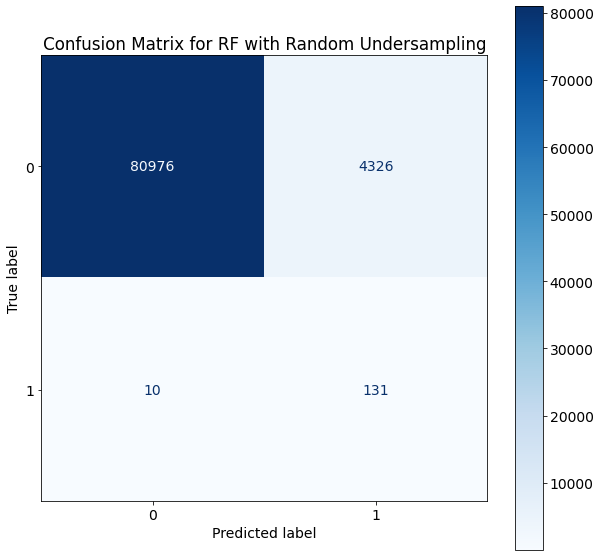

In [28]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Confusion Matrix for RF with Random Undersampling')
plot_confusion_matrix(RF_under, X_test, y_test, cmap='Blues', ax=ax, values_format='d')

## Precision, Recall and F1 Score for RF with Random Undersampling

### Precision

In [29]:
precision_RF_1 = round(precision_score(y_test,y_RF_pred,pos_label=1),5)
print(precision_RF_1)
precision_RF_0 = round(precision_score(y_test,y_RF_pred,pos_label=0),5)
print(precision_RF_0)
precision_RF_avg = round(precision_score(y_test,y_RF_pred,average='weighted'),5)
print(precision_RF_avg)

0.02939
0.99988
0.99828


### Recall

In [30]:
recall_RF_1 = round(recall_score(y_test,y_RF_pred,pos_label=1),5)
print(recall_RF_1)
recall_RF_0 = round(recall_score(y_test,y_RF_pred,pos_label=0),5)
print(recall_RF_0)
recall_RF_avg = round(recall_score(y_test,y_RF_pred,average='weighted'),5)
print(recall_RF_avg)

0.92908
0.94929
0.94925


### F1 Score

In [31]:
f1_RF_1 = round(f1_score(y_test,y_RF_pred,pos_label=1),5)
print(f1_RF_1)
f1_RF_0 = round(precision_score(y_test,y_RF_pred,pos_label=0),5)
print(f1_RF_0)
f1_RF_avg = round(f1_score(y_test,y_RF_pred,average='weighted'),5)
print(f1_RF_avg)

0.05698
0.99988
0.97241


### Classification Report

In [32]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_RF_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

     Class 0    0.99988   0.94929   0.97392     85302
     Class 1    0.02939   0.92908   0.05698       141

    accuracy                        0.94925     85443
   macro avg    0.51463   0.93918   0.51545     85443
weighted avg    0.99828   0.94925   0.97241     85443



## PR Curve

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    2.9s finished


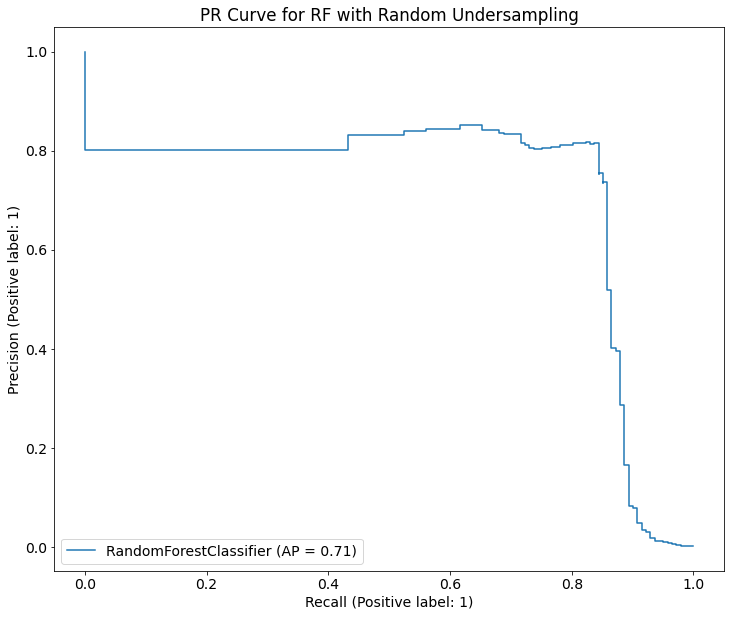

In [33]:
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('PR Curve for RF with Random Undersampling')
plot_precision_recall_curve(RF_under, X_test, y_test, ax=ax)

## ROC Curve

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    2.8s finished


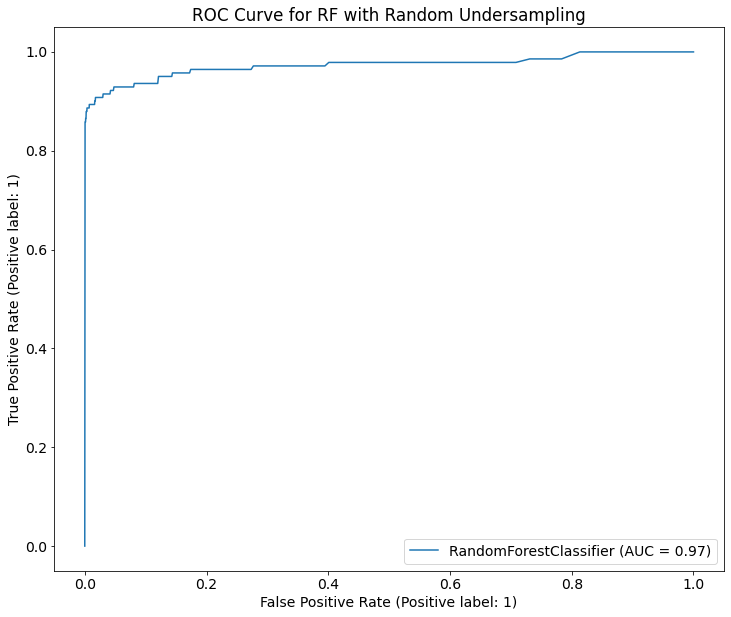

In [34]:
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('ROC Curve for RF with Random Undersampling')
plot_roc_curve(RF_under, X_test, y_test, ax=ax)

# Random Forest with SMOTE

## Parameter Tuning using Cross-Validation

In [35]:
clf = RandomForestClassifier(random_state=14)
search_smote = GridSearchCV(clf, RF_PARAM, cv=10, verbose=3)

In [36]:
search_smote.fit(X_smote_7,y_smote_7)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV 1/10] END ..............................n_estimators=100; total time= 4.1min
[CV 2/10] END ..............................n_estimators=100; total time= 4.2min
[CV 3/10] END ..............................n_estimators=100; total time= 4.1min
[CV 4/10] END ..............................n_estimators=100; total time= 3.4min
[CV 5/10] END ..............................n_estimators=100; total time= 3.3min
[CV 6/10] END ..............................n_estimators=100; total time= 3.4min
[CV 7/10] END ..............................n_estimators=100; total time= 3.3min
[CV 8/10] END ..............................n_estimators=100; total time= 3.4min
[CV 9/10] END ..............................n_estimators=100; total time= 3.4min
[CV 10/10] END .............................n_estimators=100; total time= 3.4min
[CV 1/10] END ..............................n_estimators=150; total time= 5.1min
[CV 2/10] END ..............................n_es

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=14),
             param_grid={'n_estimators': [100, 150, 200, 250, 300, 350, 400,
                                          450, 500]},
             verbose=3)

In [37]:
best_n_estimator = search_smote.best_params_['n_estimators']
print(best_n_estimator) 
RF_smote = RandomForestClassifier(n_estimators=best_n_estimator, verbose=2)
RF_smote.fit(X_smote_7, y_smote_7)
y_RF_pred = RF_smote.predict(X_test)

200
building tree 1 of 200


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  7.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.9s finished


## Confusion Matrix for RF with SMOTE

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.9s finished


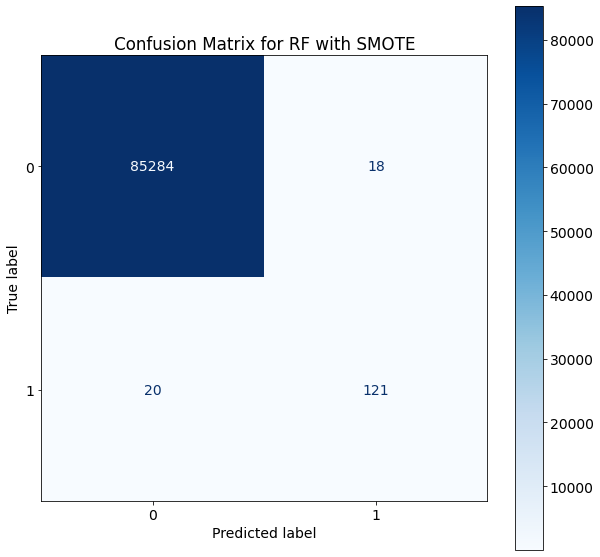

In [38]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Confusion Matrix for RF with SMOTE')
plot_confusion_matrix(RF_smote, X_test, y_test, cmap='Blues', ax=ax, values_format='d')

## Precision, Recall and F1 Score for RF with SMOTE

### Precision

In [39]:
precision_RF_1 = round(precision_score(y_test,y_RF_pred,pos_label=1),5)
print(precision_RF_1)
precision_RF_0 = round(precision_score(y_test,y_RF_pred,pos_label=0),5)
print(precision_RF_0)
precision_RF_avg = round(precision_score(y_test,y_RF_pred,average='weighted'),5)
print(precision_RF_avg)

0.8705
0.99977
0.99955


### Recall

In [40]:
recall_RF_1 = round(recall_score(y_test,y_RF_pred,pos_label=1),5)
print(recall_RF_1)
recall_RF_0 = round(recall_score(y_test,y_RF_pred,pos_label=0),5)
print(recall_RF_0)
recall_RF_avg = round(recall_score(y_test,y_RF_pred,average='weighted'),5)
print(recall_RF_avg)

0.85816
0.99979
0.99956


### F1 Score

In [41]:
f1_RF_1 = round(f1_score(y_test,y_RF_pred,pos_label=1),5)
print(f1_RF_1)
f1_RF_0 = round(precision_score(y_test,y_RF_pred,pos_label=0),5)
print(f1_RF_0)
f1_RF_avg = round(f1_score(y_test,y_RF_pred,average='weighted'),5)
print(f1_RF_avg)

0.86429
0.99977
0.99955


### Classification Report

In [42]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_RF_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

     Class 0    0.99977   0.99979   0.99978     85302
     Class 1    0.87050   0.85816   0.86429       141

    accuracy                        0.99956     85443
   macro avg    0.93513   0.92897   0.93203     85443
weighted avg    0.99955   0.99956   0.99955     85443



## PR Curve

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.9s finished


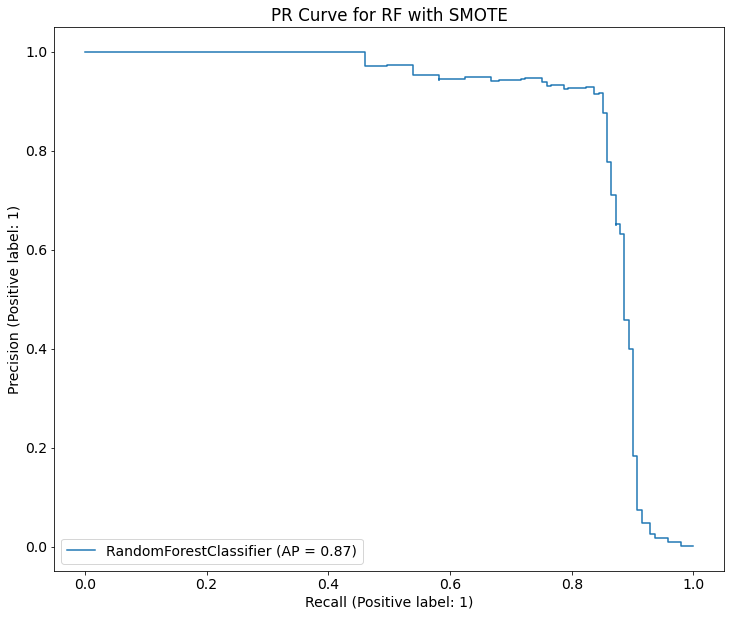

In [44]:
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('PR Curve for RF with SMOTE')
plot_precision_recall_curve(RF_smote, X_test, y_test, ax=ax)

## ROC Curve

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    2.1s finished


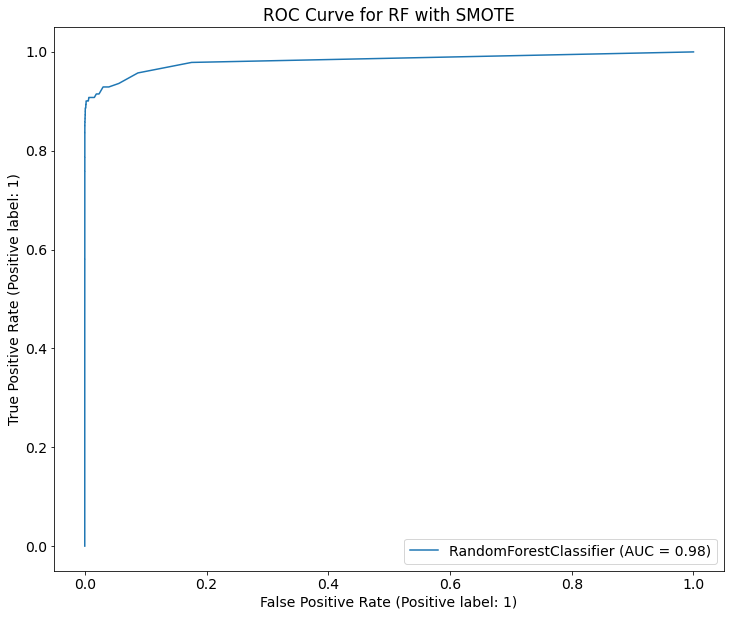

In [46]:
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('ROC Curve for RF with SMOTE')
plot_roc_curve(RF_smote, X_test, y_test, ax=ax)

# Random Forest with Tomek Links Removal

## Parameter Tuning using Cross-Validation

In [13]:
clf = RandomForestClassifier(random_state=14)
search_tomek = GridSearchCV(clf, RF_PARAM, cv=10, verbose=3)

In [14]:
search_tomek.fit(X_tomek,y_tomek)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV 1/10] END ..............................n_estimators=100; total time= 2.8min
[CV 2/10] END ..............................n_estimators=100; total time= 2.5min
[CV 3/10] END ..............................n_estimators=100; total time= 2.9min
[CV 4/10] END ..............................n_estimators=100; total time= 3.3min
[CV 5/10] END ..............................n_estimators=100; total time= 3.0min
[CV 6/10] END ..............................n_estimators=100; total time= 3.3min
[CV 7/10] END ..............................n_estimators=100; total time= 3.3min
[CV 8/10] END ..............................n_estimators=100; total time= 3.2min
[CV 9/10] END ..............................n_estimators=100; total time= 3.3min
[CV 10/10] END .............................n_estimators=100; total time= 3.6min
[CV 1/10] END ..............................n_estimators=150; total time= 5.1min
[CV 2/10] END ..............................n_es

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=14),
             param_grid={'n_estimators': [100, 150, 200, 250, 300, 350, 400,
                                          450, 500]},
             verbose=3)

In [15]:
best_n_estimator = search_tomek.best_params_['n_estimators']
print(best_n_estimator) 
RF_tomek = RandomForestClassifier(n_estimators=best_n_estimator, verbose=2)
RF_tomek.fit(X_tomek, y_tomek)
y_RF_pred = RF_tomek.predict(X_test)

100
building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished


## Confusion Matrix for RF with Tomek Links Removal

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished


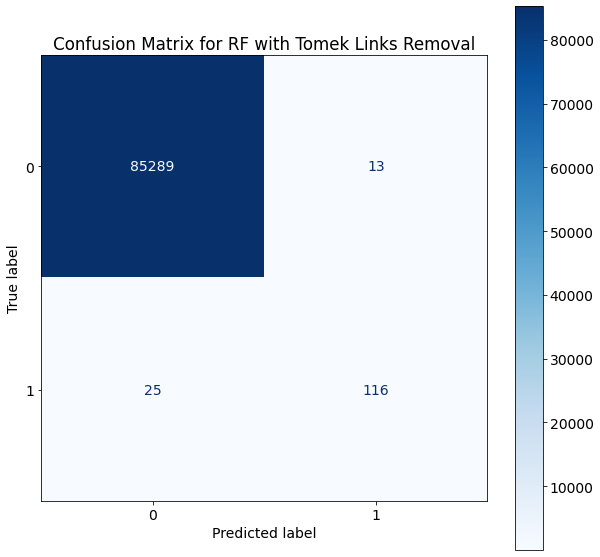

In [16]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Confusion Matrix for RF with Tomek Links Removal')
plot_confusion_matrix(RF_tomek, X_test, y_test, cmap='Blues', ax=ax, values_format='d')

## Precision, Recall and F1 Score for RF with Tomek Links Removal

### Precision

In [17]:
precision_RF_1 = round(precision_score(y_test,y_RF_pred,pos_label=1),5)
print(precision_RF_1)
precision_RF_0 = round(precision_score(y_test,y_RF_pred,pos_label=0),5)
print(precision_RF_0)
precision_RF_avg = round(precision_score(y_test,y_RF_pred,average='weighted'),5)
print(precision_RF_avg)

0.89922
0.99971
0.99954


### Recall

In [18]:
recall_RF_1 = round(recall_score(y_test,y_RF_pred,pos_label=1),5)
print(recall_RF_1)
recall_RF_0 = round(recall_score(y_test,y_RF_pred,pos_label=0),5)
print(recall_RF_0)
recall_RF_avg = round(recall_score(y_test,y_RF_pred,average='weighted'),5)
print(recall_RF_avg)

0.8227
0.99985
0.99956


### F1 Score

In [19]:
f1_RF_1 = round(f1_score(y_test,y_RF_pred,pos_label=1),5)
print(f1_RF_1)
f1_RF_0 = round(precision_score(y_test,y_RF_pred,pos_label=0),5)
print(f1_RF_0)
f1_RF_avg = round(f1_score(y_test,y_RF_pred,average='weighted'),5)
print(f1_RF_avg)

0.85926
0.99971
0.99955


### Classification Report

In [20]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_RF_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

     Class 0    0.99971   0.99985   0.99978     85302
     Class 1    0.89922   0.82270   0.85926       141

    accuracy                        0.99956     85443
   macro avg    0.94947   0.91127   0.92952     85443
weighted avg    0.99954   0.99956   0.99955     85443



## PR Curve

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished


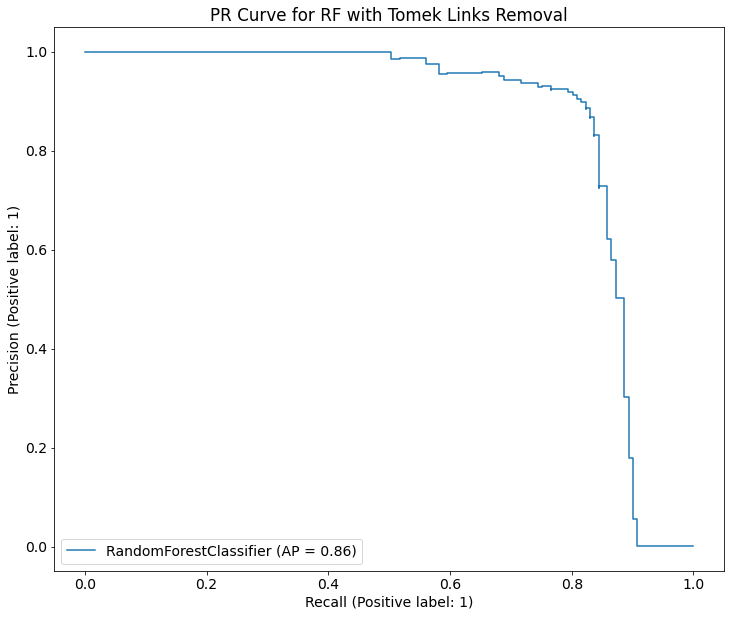

In [21]:
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('PR Curve for RF with Tomek Links Removal')
plot_precision_recall_curve(RF_tomek, X_test, y_test, ax=ax)

## ROC Curve

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished


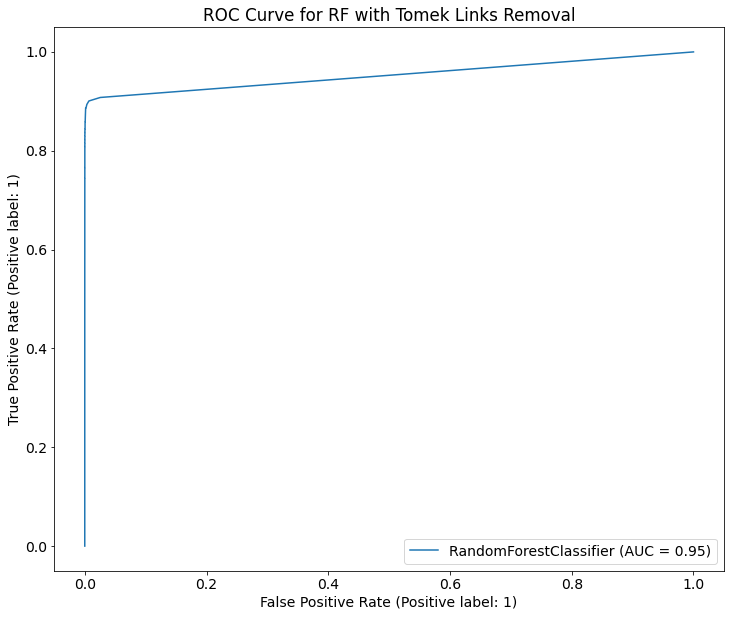

In [22]:
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('ROC Curve for RF with Tomek Links Removal')
plot_roc_curve(RF_tomek, X_test, y_test, ax=ax)

# Random Forest with Hybrid Resampling

## Parameter Tuning using Cross-Validation

In [18]:
clf = RandomForestClassifier(random_state=14)
search_hybrid = GridSearchCV(clf, RF_PARAM, cv=10, verbose=3)

In [19]:
search_hybrid.fit(X_hybrid,y_hybrid)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV 1/10] END ..............................n_estimators=100; total time= 3.4min
[CV 2/10] END ..............................n_estimators=100; total time= 3.4min
[CV 3/10] END ..............................n_estimators=100; total time= 3.4min
[CV 4/10] END ..............................n_estimators=100; total time= 3.4min
[CV 5/10] END ..............................n_estimators=100; total time= 3.3min
[CV 6/10] END ..............................n_estimators=100; total time= 3.4min
[CV 7/10] END ..............................n_estimators=100; total time= 3.4min
[CV 8/10] END ..............................n_estimators=100; total time= 3.4min
[CV 9/10] END ..............................n_estimators=100; total time= 3.4min
[CV 10/10] END .............................n_estimators=100; total time= 3.4min
[CV 1/10] END ..............................n_estimators=150; total time= 5.1min
[CV 2/10] END ..............................n_es

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=14),
             param_grid={'n_estimators': [100, 150, 200, 250, 300, 350, 400,
                                          450, 500]},
             verbose=3)

In [21]:
best_n_estimator = search_hybrid.best_params_['n_estimators']
print(best_n_estimator) 
RF_hybrid = RandomForestClassifier(n_estimators=best_n_estimator, verbose=2)
RF_hybrid.fit(X_hybrid, y_hybrid)
y_RF_pred = RF_hybrid.predict(X_test)

250
building tree 1 of 250


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


building tree 2 of 250
building tree 3 of 250
building tree 4 of 250
building tree 5 of 250
building tree 6 of 250
building tree 7 of 250
building tree 8 of 250
building tree 9 of 250
building tree 10 of 250
building tree 11 of 250
building tree 12 of 250
building tree 13 of 250
building tree 14 of 250
building tree 15 of 250
building tree 16 of 250
building tree 17 of 250
building tree 18 of 250
building tree 19 of 250
building tree 20 of 250
building tree 21 of 250
building tree 22 of 250
building tree 23 of 250
building tree 24 of 250
building tree 25 of 250
building tree 26 of 250
building tree 27 of 250
building tree 28 of 250
building tree 29 of 250
building tree 30 of 250
building tree 31 of 250
building tree 32 of 250
building tree 33 of 250
building tree 34 of 250
building tree 35 of 250
building tree 36 of 250
building tree 37 of 250
building tree 38 of 250
building tree 39 of 250
building tree 40 of 250
building tree 41 of 250
building tree 42 of 250
building tree 43 of 250


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  9.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    2.5s finished


## Confusion Matrix for RF with Hybrid Resampling

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    2.4s finished


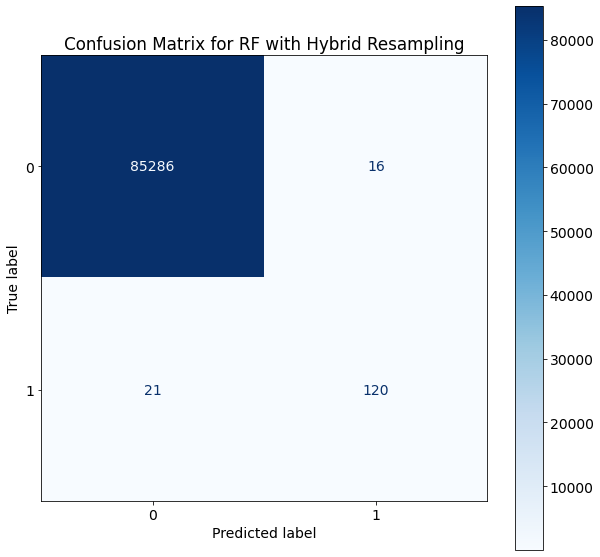

In [22]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Confusion Matrix for RF with Hybrid Resampling')
plot_confusion_matrix(RF_hybrid, X_test, y_test, cmap='Blues', ax=ax, values_format='d')

## Precision, Recall and F1 Score for RF with Hybrid Resampling

### Precision

In [23]:
precision_RF_1 = round(precision_score(y_test,y_RF_pred,pos_label=1),5)
print(precision_RF_1)
precision_RF_0 = round(precision_score(y_test,y_RF_pred,pos_label=0),5)
print(precision_RF_0)
precision_RF_avg = round(precision_score(y_test,y_RF_pred,average='weighted'),5)
print(precision_RF_avg)

0.88235
0.99975
0.99956


### Recall

In [24]:
recall_RF_1 = round(recall_score(y_test,y_RF_pred,pos_label=1),5)
print(recall_RF_1)
recall_RF_0 = round(recall_score(y_test,y_RF_pred,pos_label=0),5)
print(recall_RF_0)
recall_RF_avg = round(recall_score(y_test,y_RF_pred,average='weighted'),5)
print(recall_RF_avg)

0.85106
0.99981
0.99957


### F1 Score

In [25]:
f1_RF_1 = round(f1_score(y_test,y_RF_pred,pos_label=1),5)
print(f1_RF_1)
f1_RF_0 = round(precision_score(y_test,y_RF_pred,pos_label=0),5)
print(f1_RF_0)
f1_RF_avg = round(f1_score(y_test,y_RF_pred,average='weighted'),5)
print(f1_RF_avg)

0.86643
0.99975
0.99956


### Classification Report

In [26]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_RF_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

     Class 0    0.99975   0.99981   0.99978     85302
     Class 1    0.88235   0.85106   0.86643       141

    accuracy                        0.99957     85443
   macro avg    0.94105   0.92544   0.93310     85443
weighted avg    0.99956   0.99957   0.99956     85443



## PR Curve

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    2.4s finished


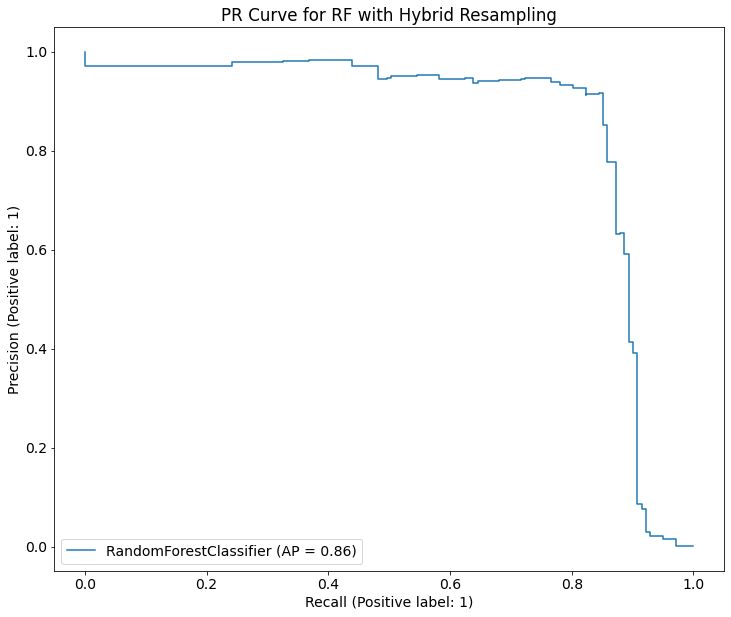

In [27]:
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('PR Curve for RF with Hybrid Resampling')
plot_precision_recall_curve(RF_hybrid, X_test, y_test, ax=ax)

## ROC Curve

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    2.4s finished


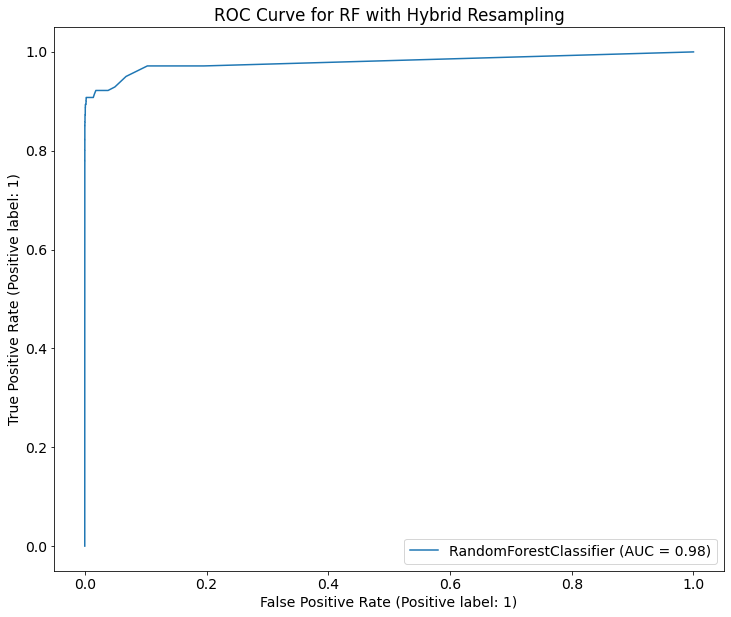

In [28]:
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('ROC Curve for RF with Hybrid Resampling')
plot_roc_curve(RF_hybrid, X_test, y_test, ax=ax)

# Random Forest with Hybrid Resampling (100%)

## Parameter Tuning using Cross-Validation

In [14]:
clf = RandomForestClassifier(random_state=14, n_jobs=2)
search_hybrid = GridSearchCV(clf, RF_PARAM, cv=10, verbose=3)

In [15]:
search_hybrid.fit(X_hybrid,y_hybrid)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV 1/10] END ..............................n_estimators=100; total time= 2.8min
[CV 2/10] END ..............................n_estimators=100; total time= 2.5min
[CV 3/10] END ..............................n_estimators=100; total time= 2.5min
[CV 4/10] END ..............................n_estimators=100; total time= 2.6min
[CV 5/10] END ..............................n_estimators=100; total time= 2.7min
[CV 6/10] END ..............................n_estimators=100; total time= 2.8min
[CV 7/10] END ..............................n_estimators=100; total time= 2.8min
[CV 8/10] END ..............................n_estimators=100; total time= 2.9min
[CV 9/10] END ..............................n_estimators=100; total time= 2.9min
[CV 10/10] END .............................n_estimators=100; total time= 3.4min
[CV 1/10] END ..............................n_estimators=150; total time= 3.6min
[CV 2/10] END ..............................n_es

GridSearchCV(cv=10, estimator=RandomForestClassifier(n_jobs=2, random_state=14),
             param_grid={'n_estimators': [100, 150, 200, 250, 300, 350, 400,
                                          450, 500]},
             verbose=3)

In [16]:
best_n_estimator = search_hybrid.best_params_['n_estimators']
print(best_n_estimator) 
RF_hybrid = RandomForestClassifier(n_estimators=best_n_estimator, random_state=14, n_jobs=2)
RF_hybrid.fit(X_hybrid, y_hybrid)
y_RF_pred = RF_hybrid.predict(X_test)

250


## Confusion Matrix for RF with Hybrid Resampling

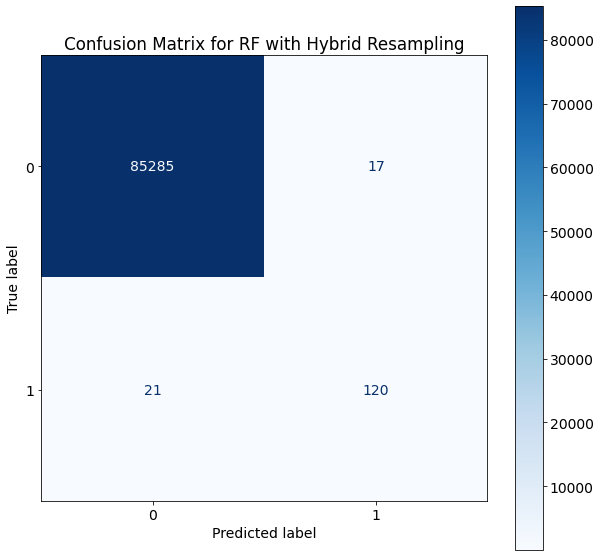

In [17]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Confusion Matrix for RF with Hybrid Resampling')
plot_confusion_matrix(RF_hybrid, X_test, y_test, cmap='Blues', ax=ax, values_format='d')

## Precision, Recall and F1 Score for RF with Hybrid Resampling

### Precision

In [18]:
precision_RF_1 = round(precision_score(y_test,y_RF_pred,pos_label=1),5)
print(precision_RF_1)
precision_RF_0 = round(precision_score(y_test,y_RF_pred,pos_label=0),5)
print(precision_RF_0)
precision_RF_avg = round(precision_score(y_test,y_RF_pred,average='weighted'),5)
print(precision_RF_avg)

0.87591
0.99975
0.99955


### Recall

In [19]:
recall_RF_1 = round(recall_score(y_test,y_RF_pred,pos_label=1),5)
print(recall_RF_1)
recall_RF_0 = round(recall_score(y_test,y_RF_pred,pos_label=0),5)
print(recall_RF_0)
recall_RF_avg = round(recall_score(y_test,y_RF_pred,average='weighted'),5)
print(recall_RF_avg)

0.85106
0.9998
0.99956


### F1 Score

In [20]:
f1_RF_1 = round(f1_score(y_test,y_RF_pred,pos_label=1),5)
print(f1_RF_1)
f1_RF_0 = round(precision_score(y_test,y_RF_pred,pos_label=0),5)
print(f1_RF_0)
f1_RF_avg = round(f1_score(y_test,y_RF_pred,average='weighted'),5)
print(f1_RF_avg)

0.86331
0.99975
0.99955


### Classification Report

In [21]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_RF_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

     Class 0    0.99975   0.99980   0.99978     85302
     Class 1    0.87591   0.85106   0.86331       141

    accuracy                        0.99956     85443
   macro avg    0.93783   0.92543   0.93154     85443
weighted avg    0.99955   0.99956   0.99955     85443



## PR Curve

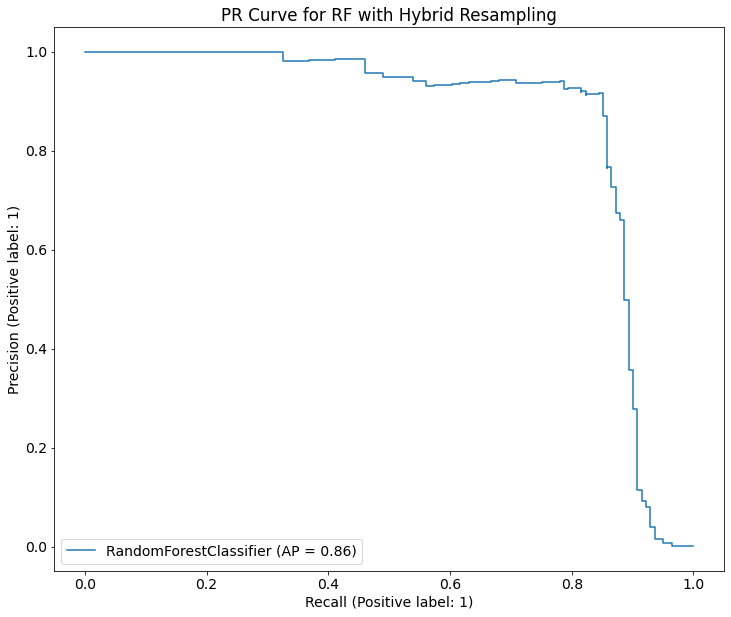

In [22]:
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('PR Curve for RF with Hybrid Resampling')
plot_precision_recall_curve(RF_hybrid, X_test, y_test, ax=ax)

## ROC Curve

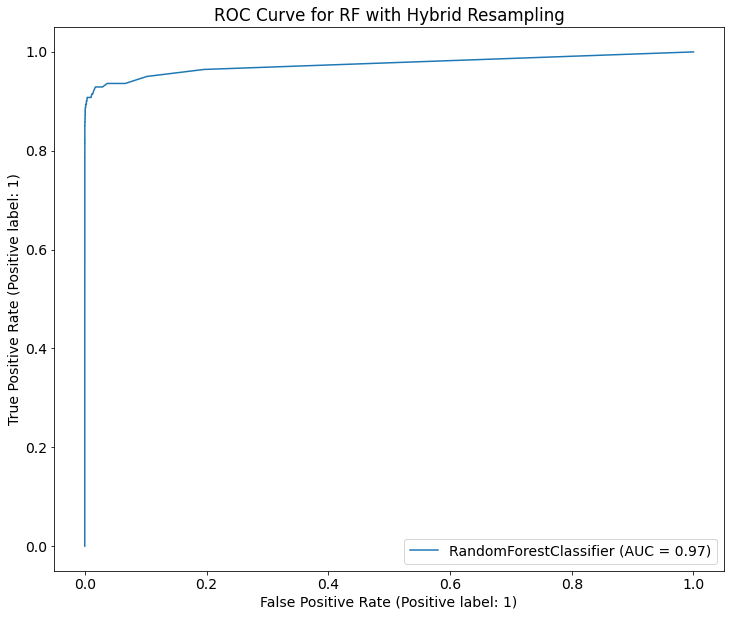

In [23]:
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('ROC Curve for RF with Hybrid Resampling')
plot_roc_curve(RF_hybrid, X_test, y_test, ax=ax)